# **Facial Emotion Detection**
<img src="https://raw.githubusercontent.com/MohitPammu/Projects/main/assets/images/facial-recognition1.png" alt="facial recognition" width="600">

**By: Mohit Pammu, MBA**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?

## **Context**
Deep Learning has found applications in many predictive tasks relating to more unstructured forms
of data over the last few years, such as images, text, audio and video. Many of these tasks seem to
be in the vein of a larger direction of predictive modeling that aims to match human-level
performance on such tasks, because humans have evolved to specialize in performing intelligent
actions on such unstructured data. As a specific branch of AI (also called Affective Computing or
Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies
and computers that can read human emotions by means of analyzing body gestures, facial
expressions, voice tone, etc. and react appropriately to them.

In the field of human-machine interaction, facial expression recognition is critical. From recent
research, it has been found that as much as 55% of communication of sentiment takes place
through facial expressions and other visual cues. Therefore, training a model to identify facial
emotions accurately is an important step towards the development of emotionally intelligent
behavior in machines with AI capabilities. Automatic facial expression recognition systems could
have many applications, including but not limited to any use case that requires human behavior
understanding, detection of mental disorders, and creating a higher quality of virtual assistant for
customer-facing businesses.

### **Why is this problem important to solve?**

Facial emotion detection is a critical area of research in artificial intelligence and human-computer interaction. Emotions play a significant role in human communication, with facial expressions accounting for up to 55% of non-verbal communication. Training machines to accurately detect and interpret facial emotions has several real-world applications, including:

* **Mental Health Monitoring:** Automated emotion detection can assist in identifying signs of mental health issues such as depression, anxiety, or stress by analyzing facial expressions over time.

* **Customer Service:** Emotionally intelligent systems can enhance customer experiences by adapting responses based on the customer's emotional state, improving satisfaction and engagement.

* **Human-Computer** Interaction: Emotion-aware systems can create more natural and intuitive interactions, such as virtual assistants that respond empathetically or educational tools that adapt to a student's emotional state.

* **Security and Surveillance:** Emotion detection can be used to identify suspicious or unusual behavior in public spaces, enhancing safety and security.

* **Entertainment and Gaming:** Emotion recognition can personalize user experiences in gaming, virtual reality, and other entertainment platforms.

By addressing these applications, facial emotion detection contributes to the development of emotionally intelligent systems that can better understand and respond to human needs.

## **Objective**
The goal of this project is to develop a robust deep learning model capable of performing multi-class emotion classification with high accuracy. The model should be able to classify facial expressions into distinct emotion categories (e.g., happy, sad, neutral, surprise) using grayscale images. Achieving this goal will enable the deployment of reliable emotion detection systems in real-world applications.

### **What are we trying to solve using data science?**

This project aims to solve the problem of accurate emotion classification using deep learning techniques. By leveraging convolutional neural networks (CNNs) and advanced data augmentation methods, the project seeks to:

* Extract meaningful features from facial images to distinguish between different emotions.

* Address challenges such as class imbalance and overlapping features between emotions.

* Build a scalable and efficient model that generalizes well to unseen data.

The ultimate objective is to create a data-driven solution that bridges the gap between human emotional understanding and machine intelligence.

## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Importing the Libraries**

In [1]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D 
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import warnings
warnings.filterwarnings('ignore')

### **Let us load and unzip the data**

In [2]:
# Downloading the dataset
path = '/Users/mohitpammu/Desktop/MIT-ADSP/Capstone Project/Deep Learning/Facial Emotion Detection/Facial_emotion_images.zip'

# Extract the files from the zip file and create a directory
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
# Defining constants
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

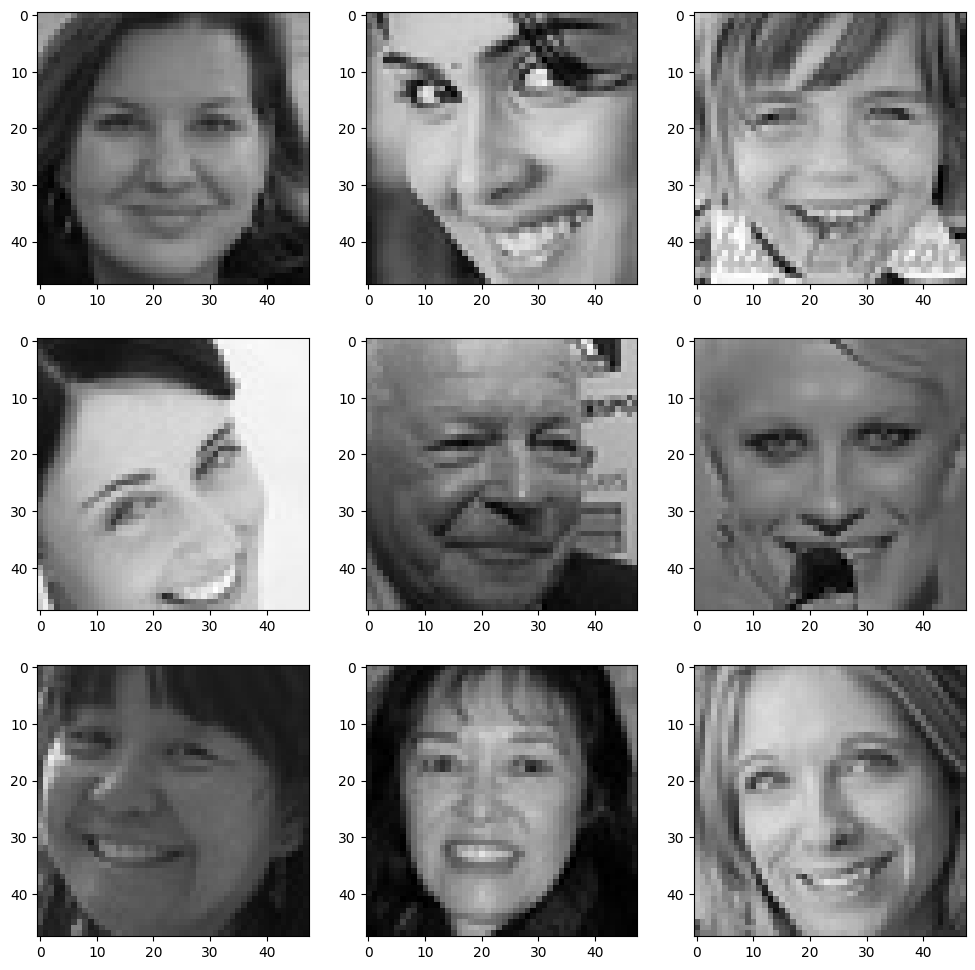

In [4]:
# Visualizing happy emotion type
happy_type = 'happy'

plt.figure(figsize = (12, 12))

# Displaying 9 images of happy emotion
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + happy_type + "/" +
                  os.listdir(folder_path + "train/" + happy_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* Notice the images are in grayscale.
* From these images, can notice distinct features such as the shape of the mouth smiling, with teeth showing and not showing.
* Also, we can see diagonal shaped dimples in the cheeks created from the mouth smiling.
* A few of the images have squinted eye shapes caused by the smile as well.
* Some of the eyebrows have a curved shape.

### **Sad**

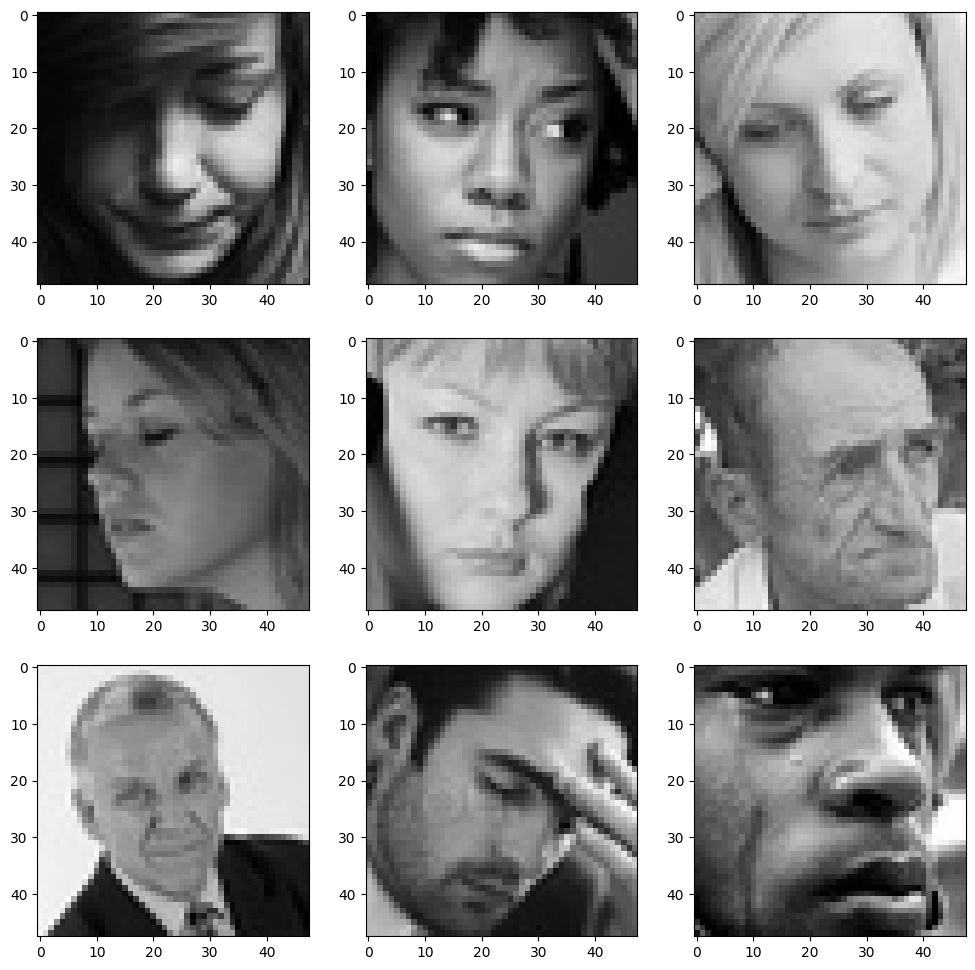

In [5]:
# Visualizing sad emotion type
sad_type = 'sad'

plt.figure(figsize = (12, 12))

# Displaying 9 images of sad emotion
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + sad_type + "/" +
                  os.listdir(folder_path + "train/" + sad_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* Notice the images are in grayscale.
* A common feature in the 'sad' class is the mouths are closed. So there can be a line distinguished between the lips as well as the shape of the lips together.
* Another feature of the images is that some of them have their eyes closed.
* There is possibility for this class to be misclassified as 'neutral' class as the features aren't very distinct.
* The eyebrows seem to be a bit more angled.
* Looks also as if there is slightly more saturation with darker shades.

### **Neutral**

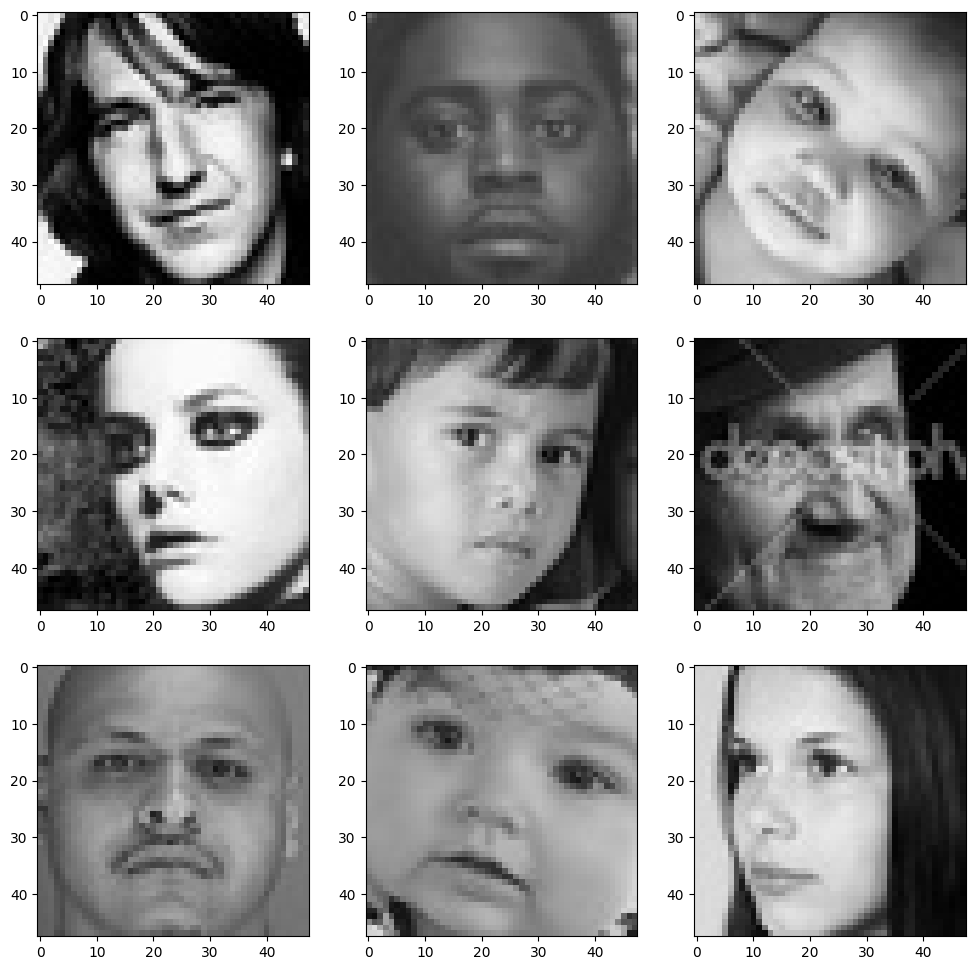

In [6]:
# Visualizing neutral emotion type
neutral_type = 'neutral'

plt.figure(figsize = (12, 12))

# Displaying 9 images of neutral emotion
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + neutral_type + "/" +
                  os.listdir(folder_path + "train/" + neutral_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* Notice all these images are in grayscale.
* From these samples, all of their eyes are open so those shapes can be distinguished.
* The mouths are closed and mostly don't have dimples on the cheeks since the expression is 'neutral'.
* The eyebrow shapes are more horizontal.
* Again, there is possibility for the class to be confused with 'sad' as there are more similarities.
* There is a presence of dark shades.

### **Surprised**

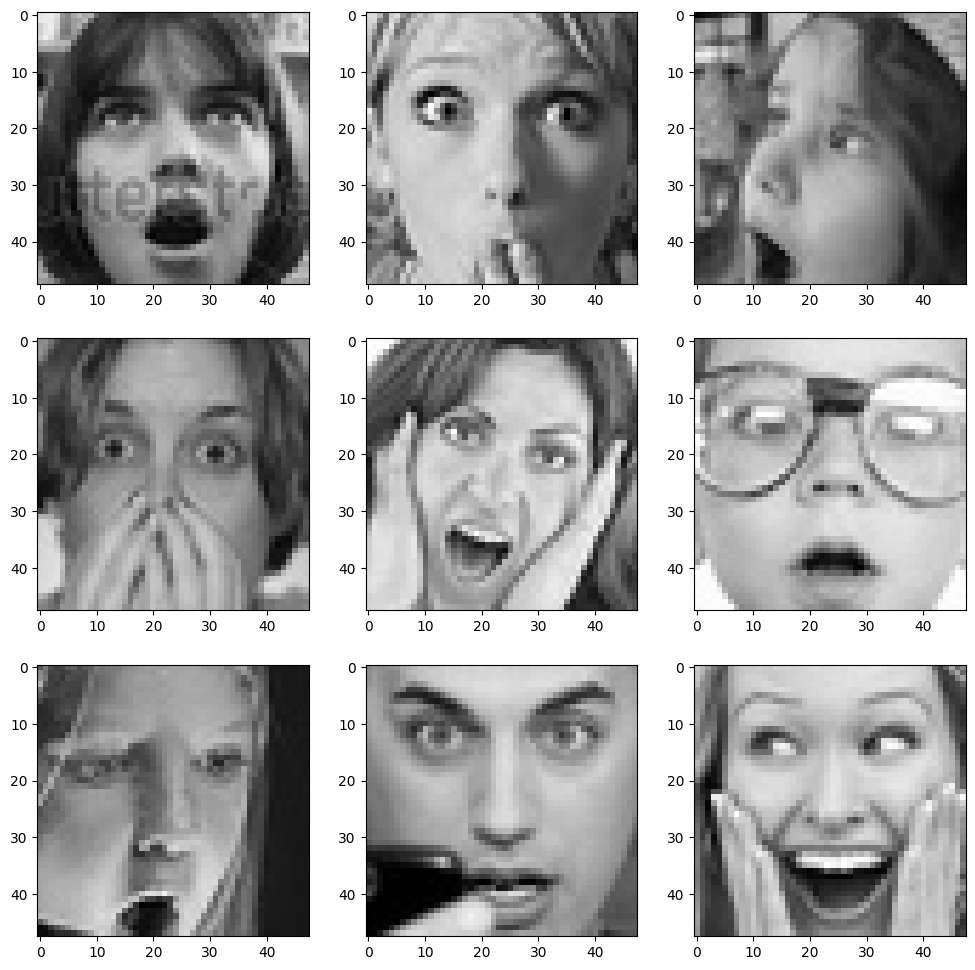

In [7]:
# Visualizing surprise emotion type
surprise_type = 'surprise'

plt.figure(figsize = (12, 12))

# Displaying 9 images of surprise emotion
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + surprise_type + "/" +
                  os.listdir(folder_path + "train/" + surprise_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**
* Notice all the images are in grayscale.
* The eye shapes are more open and roundish.
* Quite a few have their mouth open or have hands on their face or cover their mouth with their hands.
* There also seems to be a more general brightness with these images, saturation of lighter colors.

## **Checking Distribution of Classes**

In [8]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':  ", num_neutral)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':      ", num_sad)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise': ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'neutral':   3978
Number of images in the class 'sad':       3982
Number of images in the class 'surprise':  3173


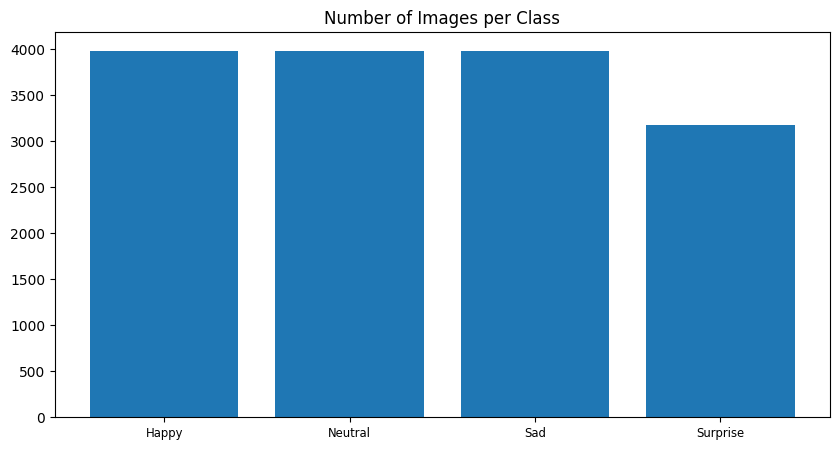

In [9]:
# Visualizing the number of images in each folder of the training set
plt.figure(figsize = (10, 5))

# Creating a dictionary with the number of images in each class
data = {'Happy': num_happy, 
        'Neutral': num_neutral,
        'Sad': num_sad, 
        'Surprise' : num_surprise}

# Creating a pandas series
df = pd.Series(data)

# Plotting the bar graph
plt.bar(range(len(df)), df.values, align = 'center')
plt.title('Number of Images per Class')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**Observations and Insights:**
* Number of images in the class 'happy':     3976
* Number of images in the class 'neutral':   3978
* Number of images in the class 'sad':       3982
* Number of images in the class 'surprise':  3173

* The classes 'happy', 'sad', and 'neutral' are about evenly distributed while the 'surprise' class has a significant amount of less images than the other classes. 
* To address this, we can use Data Augmentation, over/under sampling by duplicating or reducing, or using class weights.
* We will choose to perform Data Augmentation and generate additional images which will help the model generalize and provide more variation instead of duplicating images and we won't delete any samples from the other classes which is valuable information in training the best model.

But before we move on to the Data Augmentation, we will continue to explore the data a bit further.

In [10]:
# Getting count of images in each folder within our testing path
num_happy_test = len(os.listdir(folder_path + "test/happy"))
print("Number of images in the class 'happy':   ", num_happy_test)

num_neutral_test = len(os.listdir(folder_path + "test/neutral"))
print("Number of images in the class 'neutral':  ", num_neutral_test)

num_sad_test = len(os.listdir(folder_path + "test/sad"))
print("Number of images in the class 'sad':      ", num_sad_test)

num_surprise_test = len(os.listdir(folder_path + "test/surprise"))
print("Number of images in the class 'surprise': ", num_surprise_test)

Number of images in the class 'happy':    32
Number of images in the class 'neutral':   32
Number of images in the class 'sad':       32
Number of images in the class 'surprise':  32


**Observations and Insights:**
* Notice all images of each class are equal to 32 in the test set.

In [11]:
# Getting count of images in each folder within our validation path
num_happy_val = len(os.listdir(folder_path + "validation/happy"))
print("Number of images in the class 'happy':   ", num_happy_val)

num_neutral_val = len(os.listdir(folder_path + "validation/neutral"))
print("Number of images in the class 'neutral':  ", num_neutral_val)

num_sad_val = len(os.listdir(folder_path + "validation/sad"))
print("Number of images in the class 'sad':      ", num_sad_val)

num_surprise_val = len(os.listdir(folder_path + "validation/surprise"))
print("Number of images in the class 'surprise': ", num_surprise_val)

Number of images in the class 'happy':    1825
Number of images in the class 'neutral':   1216
Number of images in the class 'sad':       1139
Number of images in the class 'surprise':  797


**Observations and Insights:**
* Notice that the 'happy' class has the most number of samples out of all the classes.
* The 'sad' and 'neutral' classes have almost similar number of samples but still significantly less than the 'happy' class.
* The 'surprise' class has the lowest number of samples at almost 1000 less than the 'happy' class.
* We will leave the validation set imbalanced as it reflects a more real-world scenario where access to an equal amount of images is not always guaranteed.
* This will also be reflected in the model performance by not placing artificial weights.

In [12]:
#Checking if all images in the dataset are grayscale
from PIL import Image

# Define the folder paths for train, validation, and test sets
folders = [folder_path + "train", folder_path + "validation", folder_path + "test"]

# Function to check if all images in a folder are grayscale
def check_grayscale(folder):
    all_grayscale = True
    for subdir, _, files in os.walk(folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Check only image files
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)
                if img.mode != 'L':  # 'L' mode indicates grayscale
                    print(f"Non-grayscale image found: {img_path} (Mode: {img.mode})")
                    all_grayscale = False
    return all_grayscale

# Check each dataset folder
for folder in folders:
    print(f"Checking folder: {folder}")
    if check_grayscale(folder):
        print(f"All images in {folder} are grayscale.")
    else:
        print(f"Some images in {folder} are not grayscale.")

Checking folder: Facial_emotion_images/train
All images in Facial_emotion_images/train are grayscale.
Checking folder: Facial_emotion_images/validation
All images in Facial_emotion_images/validation are grayscale.
Checking folder: Facial_emotion_images/test
All images in Facial_emotion_images/test are grayscale.


**Observations and Insights:**
* All the images in the loaded folders are the same size (we know this from the initial load) and format which will help keep the analysis more consistent.

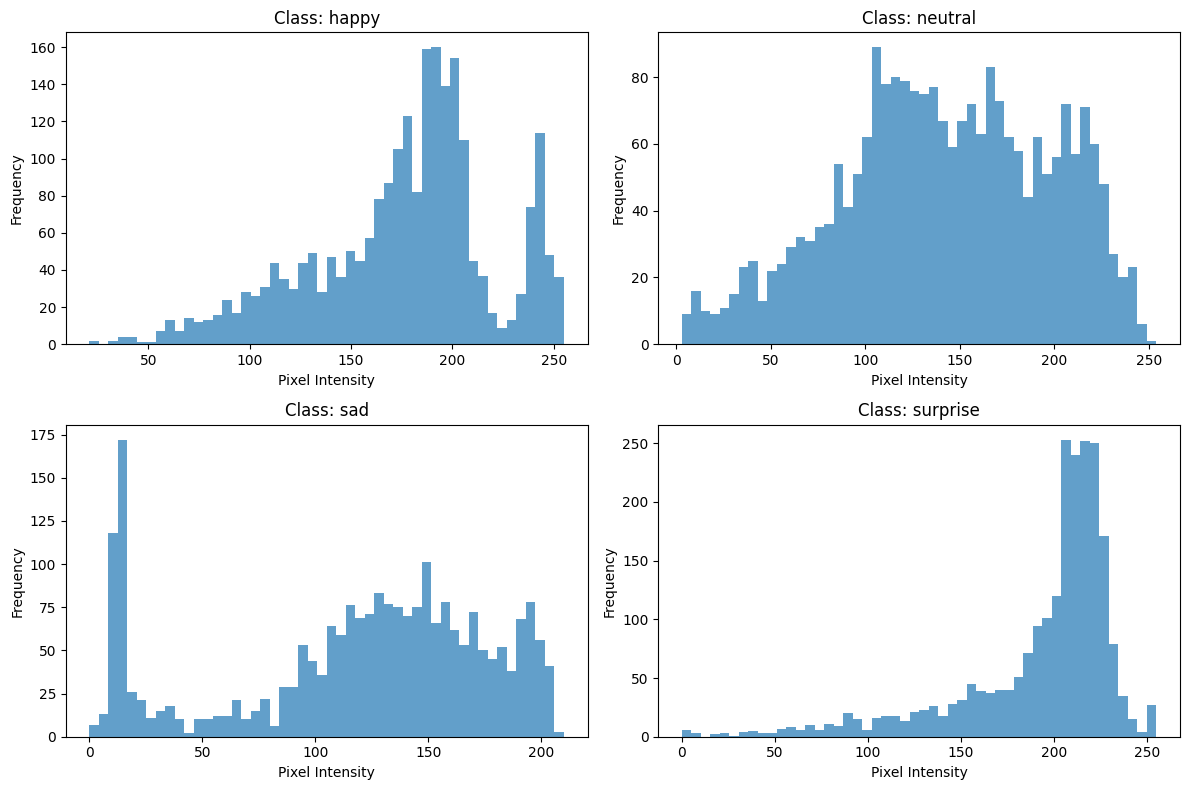

In [13]:
# Visualizing pixel intensity distribution
class_labels = ['happy', 'neutral', 'sad', 'surprise']
plt.figure(figsize=(12, 8)) 

# Loop through each class and plot the pixel intensity distribution
for i, label in enumerate(class_labels):
    folder = folder_path + f"train/{label}/"
    sample_image = os.listdir(folder)[0]
    img = load_img(folder + sample_image, target_size=(48, 48), color_mode="grayscale")
    img_array = img_to_array(img).flatten()
    
    # Create a subplot for each class
    plt.subplot(2, 2, i + 1)
    plt.hist(img_array, bins=50, alpha=0.7)
    plt.title(f"Class: {label}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Observations and Insights:**
* From the class histograms above, we can see the distributions are different:
    * For **'happy'** class - the distribution is skewed left with the peak towards higher intensities meaning the image is brighter overall.
    * For **'sad'** class - there is a peak at a low intensity (unlike the other classes) meaning there is a presence of certain features in the image like edges while the rest of the distribution is concentrated towards the right in higher intensities.
    * For **'neutral'** class - the distribution seems to be the most normal across all classes with a majority of pixel intensities occurring in the middle (highest peak at 100).
    * For the **'surprise'** class - the distribution is similar to the 'happy' class where it is skewed left and has the peak towards higher intensities meaning the image is brighter overall.

* We can note that based on these distributions, the model could get confused between the 'happy' and 'surprise' class while the 'neutral' and 'sad' classes have more distinct distributions.

* Since the above plot only displayed the distributions for a single image in each class, we will do further analysis using more images to get a better understanding.


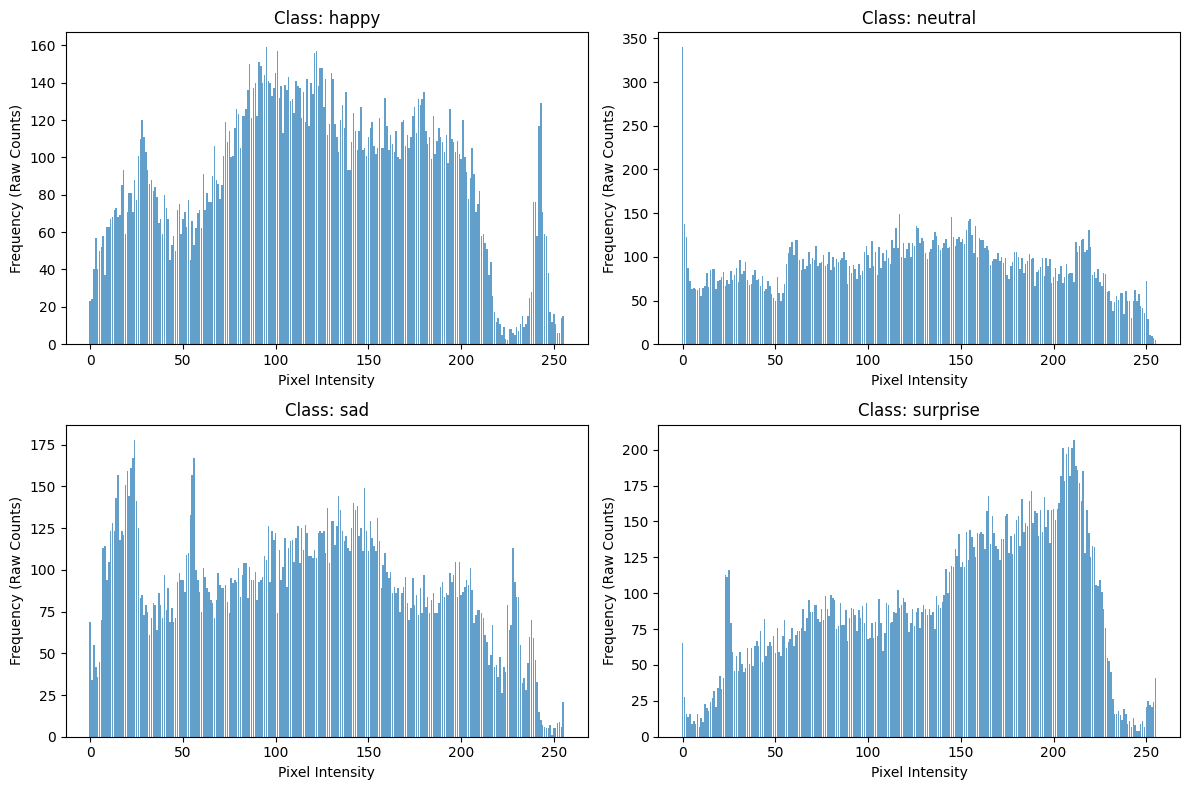

In [14]:
# Visualizing pixel intensity distribution for multiple images
num_images_per_class = 10  # Number of images to sample per class
plt.figure(figsize=(12, 8))

# Iterate through each class
for i, label in enumerate(class_labels):
    folder = folder_path + f"train/{label}/"
    pixel_sums = np.zeros(256)  # Array to store pixel intensity counts (0-255)

    # Process multiple images in the class folder
    for file in os.listdir(folder)[:num_images_per_class]:  # Limit to first N images
        img = load_img(folder + file, target_size=(48, 48), color_mode="grayscale")
        img_array = img_to_array(img).flatten()  # Flatten the image into a 1D array
        hist, _ = np.histogram(img_array, bins=256, range=(0, 256))  # Histogram of pixel intensities
        pixel_sums += hist  # Add the histogram to the sum

    # Plot the raw pixel sums for the class
    plt.subplot(2, 2, i + 1)
    plt.bar(range(256), pixel_sums, alpha=0.7)
    plt.title(f"Class: {label}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency (Raw Counts)")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Observations and Insights:**
* 'Happy' class has a majority of frequencies in the middle pixel intensity with a spike close to 250.
* 'Sad' class has a spike at the low end of pixel intensity but otherwise is a somewhat normal distribution.
* 'Neutral' class has a spike right at 0 but is otherwise mostly uniform distribution.
* 'Surprise' class is more left skewed and has the highest peak at the high end of pixel intensity meaning more pictures are brighter.

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**We will now begin with the Data Augmentation to address the imbalance of classes in the training dataset, specifically with the 'surprise' class being significantly lower than the other classes.**

In [15]:
# Data Augmentation
import cv2
import random

# Set random seed for reproducibility
random.seed(24)
np.random.seed(24)
tf.random.set_seed(24)

# Define Augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Paths
surprise_dir = "Facial_emotion_images/train/surprise"
augmented_dir = "Facial_emotion_images/train/surprise_augmented"

# Ensure the augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Count current images
current_size = len(os.listdir(surprise_dir))
target_size = 3985  # Match the largest class

# Calculate how many new images to generate
num_new_images = target_size - current_size
print(f"Generating {num_new_images} new 'surprise' images...")

# Augment images
images = os.listdir(surprise_dir)
generated = 0

for img_name in images:
    if generated >= num_new_images:
        break

    img_path = os.path.join(surprise_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

    # Ensure image is loaded correctly
    if img is None:
        print(f"Skipping {img_name} (unable to load).")
        continue

    # Expand dimensions for Keras compatibility (H, W) -> (H, W, 1)
    img = np.expand_dims(img, axis=(0, -1))

    # Generate augmentations
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpg'):
        generated += 1
        i += 1
        if generated >= num_new_images or i >= 3:  # Generate up to 3 variations per image
            break

print("Data augmentation completed!")

Generating 812 new 'surprise' images...
Data augmentation completed!


In [16]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':  ", num_neutral)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':      ", num_sad)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise': ", num_surprise)

num_surprise_augmented = len(os.listdir(folder_path + "train/surprise_augmented"))
print("Number of images in the class 'surprise_augmented': ", num_surprise_augmented)

Number of images in the class 'happy':    3976
Number of images in the class 'neutral':   3978
Number of images in the class 'sad':       3982
Number of images in the class 'surprise':  3173
Number of images in the class 'surprise_augmented':  773


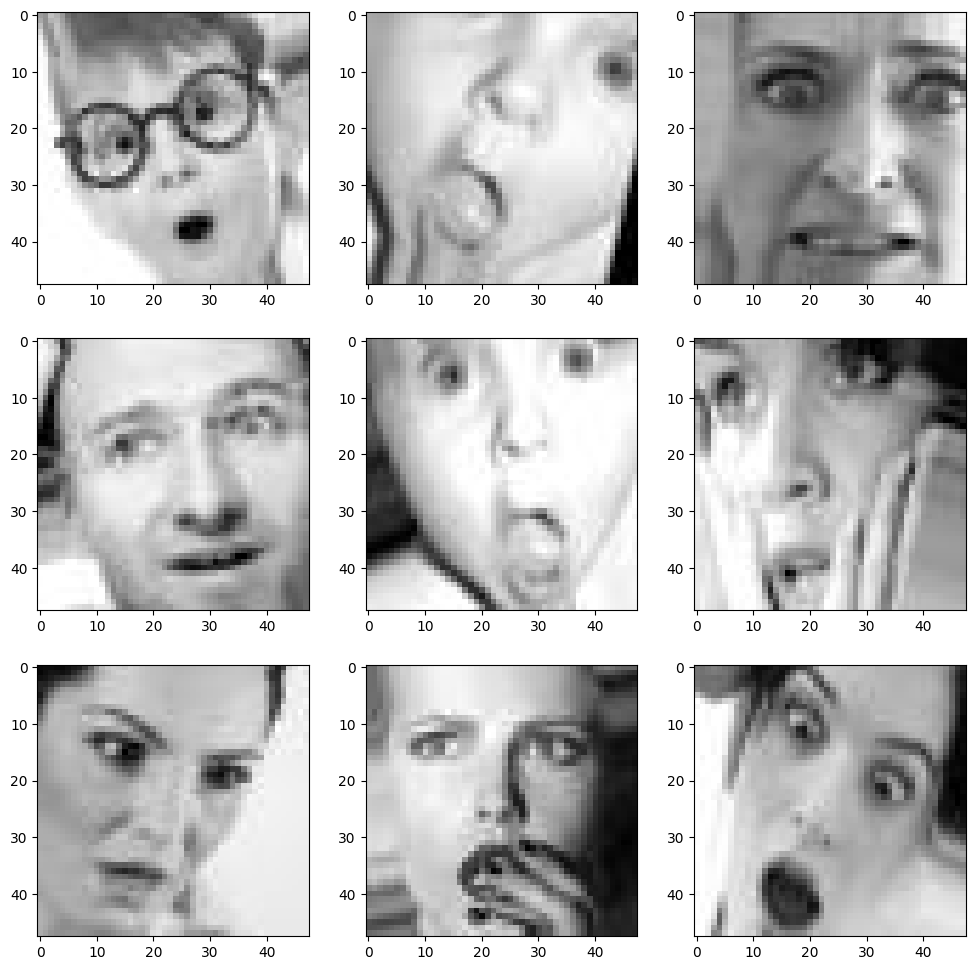

In [17]:
# Visualizing images from the augmented 'surprise' class to verify augmentation
surprise_augmented_type = 'surprise_augmented'

plt.figure(figsize = (12, 12))

# Displaying 9 images of surprise augmented emotion
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "train/" + surprise_augmented_type + "/" +
                  os.listdir(folder_path + "train/" + surprise_augmented_type)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* We can see these generated augmented images fit a similar profile (more rounded eyes, open mouths, and hands on face) to the 'surprise' class and are appropriate for use.

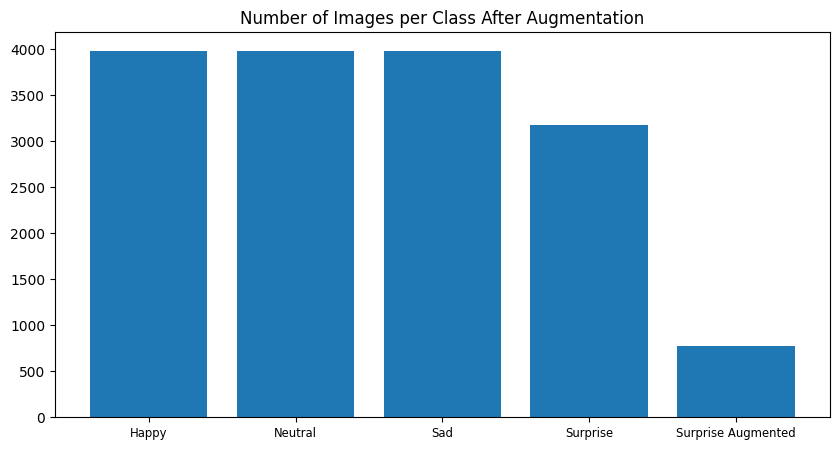

In [18]:
# Visualizing the updated distribution of images in each folder of the training set
plt.figure(figsize = (10, 5))

# Creating a dictionary with the number of images in each class
data = {'Happy': num_happy,  
        'Neutral': num_neutral,
        'Sad': num_sad, 
        'Surprise' : num_surprise, 
        'Surprise Augmented' : num_surprise_augmented}

# Creating a pandas series
df = pd.Series(data)

# Plotting the bar graph
plt.title('Number of Images per Class After Augmentation')
plt.bar(range(len(df)), df.values, align = 'center')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**We'll now move the augmented images into the original 'surprise' class training folder.**

In [19]:
import shutil

# Move Augmented Images to Original Folder
for img_name in os.listdir(augmented_dir):
    src = os.path.join(augmented_dir, img_name)
    dst = os.path.join(surprise_dir, img_name)

    # Avoid overwriting: rename if necessary
    if os.path.exists(dst):
        base, ext = os.path.splitext(img_name)
        dst = os.path.join(surprise_dir, f"aug_{base}{ext}")

    shutil.move(src, dst)

print(f"Merged augmented images into '{surprise_dir}'. Final count: {len(os.listdir(surprise_dir))} images.")

# Remove the augmented directory
shutil.rmtree(augmented_dir)
print("Removed temporary augmented directory.")

Merged augmented images into 'Facial_emotion_images/train/surprise'. Final count: 3946 images.
Removed temporary augmented directory.


In [20]:
# Verify the move
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':    ", num_happy)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':  ", num_neutral)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':      ", num_sad)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise': ", num_surprise)

Number of images in the class 'happy':     3976
Number of images in the class 'neutral':   3978
Number of images in the class 'sad':       3982
Number of images in the class 'surprise':  3946


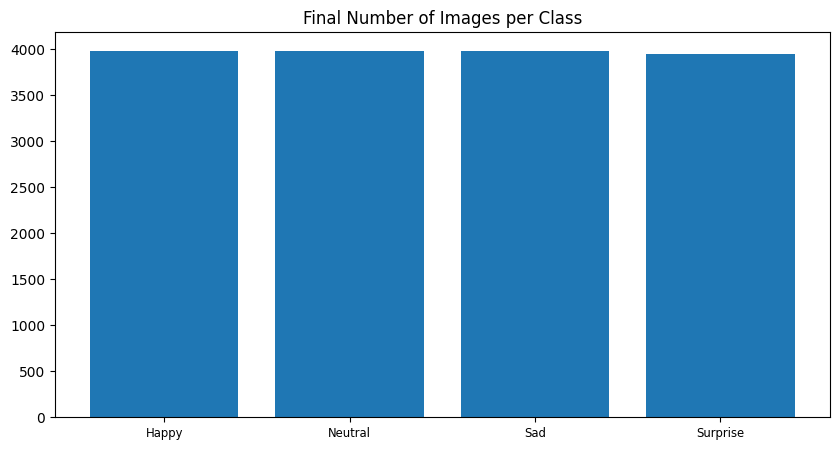

In [21]:
# Visualizing the final distribution of images
plt.figure(figsize = (10, 5))

# Creating a dictionary with the number of images in each class
data = {'Happy': num_happy, 'Neutral': num_neutral, 'Sad': num_sad, 'Surprise' : num_surprise}

# Creating a pandas series
df = pd.Series(data)

# Plotting the bar graph
plt.bar(range(len(df)), df.values, align = 'center')
plt.title('Final Number of Images per Class')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**Observations and Insights:**
* Now we can see that all the classes are balanced and can be used to train our models going forward.

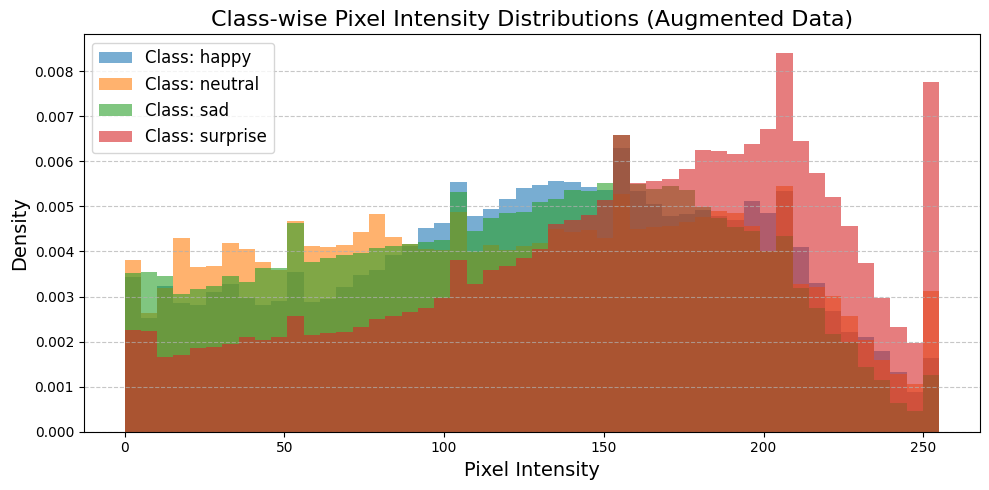

In [128]:
# Visualizing pixel intensity distributions for augmented data

# Define the folder paths for augmented train set
folder_path = "Facial_emotion_images/train"
class_labels = ['happy', 'neutral', 'sad', 'surprise']

# Function to calculate pixel intensity distributions
def calculate_pixel_intensity_distribution(folder_path, class_labels, num_images=100):
    distributions = {}
    for label in class_labels:
        class_folder = os.path.join(folder_path, label)
        pixel_intensities = []
        for img_name in os.listdir(class_folder)[:num_images]:  # Limit to first 'num_images' images
            img_path = os.path.join(class_folder, img_name)
            img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")  # Load as grayscale
            img_array = img_to_array(img).flatten()  # Flatten the image into a 1D array
            pixel_intensities.extend(img_array)
        distributions[label] = pixel_intensities
    return distributions

# Calculate pixel intensity distributions for augmented data
augmented_distributions = calculate_pixel_intensity_distribution(folder_path, class_labels)

# Plot the pixel intensity distributions in one plot
plt.figure(figsize=(10, 5))
for label, intensities in augmented_distributions.items():
    plt.hist(intensities, bins=50, alpha=0.6, label=f"Class: {label}", density=True)

# Add legend, title, and labels
plt.title("Class-wise Pixel Intensity Distributions (Augmented Data)", fontsize=16)
plt.xlabel("Pixel Intensity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

**Observations and Insights:**
* **'Happy' and 'Surprise' Classes:** Both have distributions skewed toward higher pixel intensities, indicating brighter images.
* **'Sad' Class:** Peaks at lower intensities, suggesting darker images with more shadows or edges.
* **'Neutral' Class:** Appears more uniform, with a balanced distribution across pixel intensities.
* **Improved Class Balance:** Augmentation has likely helped balance the distributions, making them more comparable across classes.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

**Observations:**
* Even though all images are in grayscale and it will save computational resources to run the model in grayscale, we will test the RGB channels to see how it affects performance first.

In [22]:
# Setting seed for reproducibility
import random

np.random.seed(24)
tf.random.set_seed(24)
random.seed(24)

In [23]:
# Creating the RGB Data Loaders
batch_size  = 32
img_size = 48

# Data Augmentation for training set to increase diversity
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Creating the training set for RGB images
train_set_rgb = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True,
                                              seed = 24)

# Note: No augmentation applied to validation set
datagen_validation = ImageDataGenerator(rescale=1./255)

# Creating the validation set for RGB images
validation_set_rgb = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

# Note: No augmentation applied to test set
datagen_test = ImageDataGenerator(rescale=1./255)

# Creating the test set for RGB images
test_set_rgb = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

Found 15882 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


**Now that we've created the Data Loaders for training and evaluation, we will build the first CNN model.**

In [24]:
# Defining the first CNN model for RGB images 
def cnn_model_1_rgb():
    
    model = Sequential()
    
    # First Convolutional Block. Note 3 channels for RGB
    model.add(Conv2D(64, (2, 2), padding = 'same', input_shape = (48, 48, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Second Convolutional Block
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Third Convolutional Block
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Fully Connected Layers 
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation = 'softmax'))

    return model

model_1_rgb = cnn_model_1_rgb()

model_1_rgb.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,572 (2.31 MB)

 Trainable params: 605,572 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

**Observations and Insights:**
* The model has 605,572 trainable parameters.

In [25]:
# Setting callbacks for optimal model saving
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("./model_1_rgb.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True,
                            mode = 'auto')

# Learning rate reduction to improve convergence
reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001,
                              mode = 'auto')

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20


In [26]:
# Compile the RGB model 1
model_1_rgb.compile(optimizer = Adam(learning_rate = 0.001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [27]:
# Train the RGB model 1
history_model_1_rgb = model_1_rgb.fit(train_set_rgb,
                    steps_per_epoch = len(train_set_rgb),
                    validation_data = validation_set_rgb,
                    validation_steps = len(validation_set_rgb),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
496/497 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2694 - loss: 1.3891
Epoch 1: val_accuracy improved from -inf to 0.37653, saving model to ./model_1_rgb.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.2694 - loss: 1.3890 - val_accuracy: 0.3765 - val_loss: 1.3539 - learning_rate: 0.0010
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3587 - loss: 1.3284
Epoch 2: val_accuracy improved from 0.37653 to 0.48483, saving model to ./model_1_rgb.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3587 - loss: 1.3283 - val_accuracy: 0.4848 - val_loss: 1.2041 - learning_rate: 0.0010
Epoch 3/20
495/497 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4554 - loss: 1.2119
Epoch 3: val_accuracy improved from 0.48483 to 0.54933, saving model to ./model_1_rgb.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.4554 - loss: 1.2118 - val_accuracy: 0.5493 - val_loss: 1.0781 - learning_rate: 0.0010
Epoch 4/20
495/497 ━━━━━━━━━━━━━━━━━━

**Observations and Insights:**
* The model trained relatively fast, completing each epoch at about 11 seconds.

In [28]:
# Evaluate RGB model 1 on the test set
test_loss, test_accuracy = model_1_rgb.evaluate(test_set_rgb, steps=len(test_set_rgb), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6812 - loss: 0.7197 
Test Accuracy: 0.6641, Test Loss: 0.7761


**Observations and Insights:**
* The model did not perform well on the test set achieving about ~66% accuracy which is less than desirable.

In [29]:
# Function to plot model performance
def plot_model_performance(history, title):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

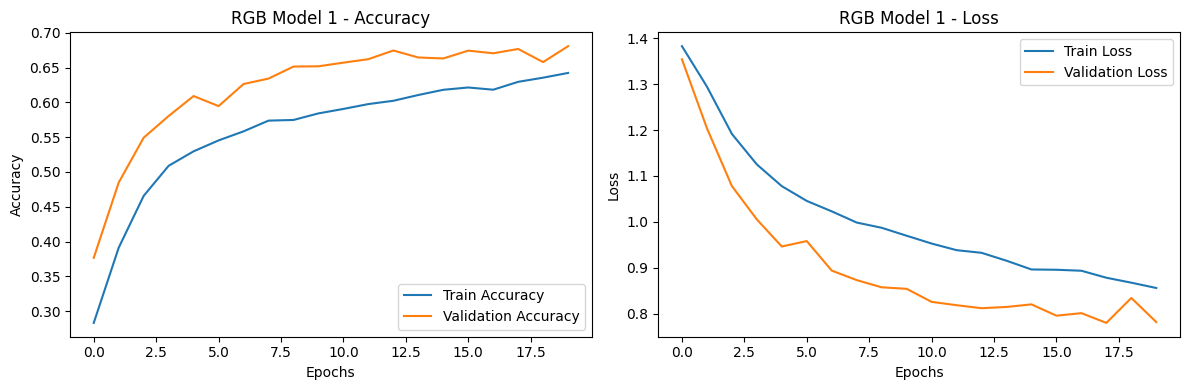

In [30]:
# Plotting the performance of RGB model 1
plot_model_performance(history_model_1_rgb, "RGB Model 1")

**Observations and Insights:**
* We can see the model performed better on the validation set than the training set, achieving about ~66% accuracy by the 17th epoch.
* The model performed worse on the training set achieving close to ~65% by the 17th epoch.
* Validation loss decreased to ~0.78 while training loss reduced to about ~0.85.

Will now create functions to generate a classification report and confusion matrix for each model going forward.

In [31]:
# Function to generate classification report for RGB model
from sklearn.metrics import classification_report

def classification_report_rgb(model, test_set_rgb, model_name='Model'):

    # Get true labels
    true_labels_rgb = test_set_rgb.classes
    
    # Get class labels
    target_names_rgb = list(test_set_rgb.class_indices.keys())
    
    # Make predictions
    predictions_rgb = model.predict(test_set_rgb, steps=len(test_set_rgb), verbose=1)
    predicted_classes_rgb = np.argmax(predictions_rgb, axis=1)
    
    # Generate classification report
    report = classification_report(true_labels_rgb, predicted_classes_rgb, target_names=target_names_rgb)
    print(f'Classification Report - {model_name}:\n')
    print(report)

In [32]:
# Function to generate confusion matrix for RGB model
from sklearn.metrics import confusion_matrix

def confusion_matrix_rgb(model, test_set_rgb, model_name="Model"):

    # Get true labels
    true_labels_rgb = test_set_rgb.classes
    
    # Get class labels
    class_labels_rgb = list(test_set_rgb.class_indices.keys())
    
    # Make predictions
    predictions_rgb = model.predict(test_set_rgb, steps=len(test_set_rgb), verbose=0)
    predicted_classes_rgb = np.argmax(predictions_rgb, axis=1)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels_rgb, predicted_classes_rgb)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_rgb, yticklabels=class_labels_rgb)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Classification Report - Model 1 RGB:

              precision    recall  f1-score   support

       happy       0.65      0.75      0.70        32
     neutral       0.60      0.66      0.63        32
         sad       0.50      0.47      0.48        32
    surprise       0.96      0.78      0.86        32

    accuracy                           0.66       128
   macro avg       0.68      0.66      0.67       128
weighted avg       0.68      0.66      0.67       128



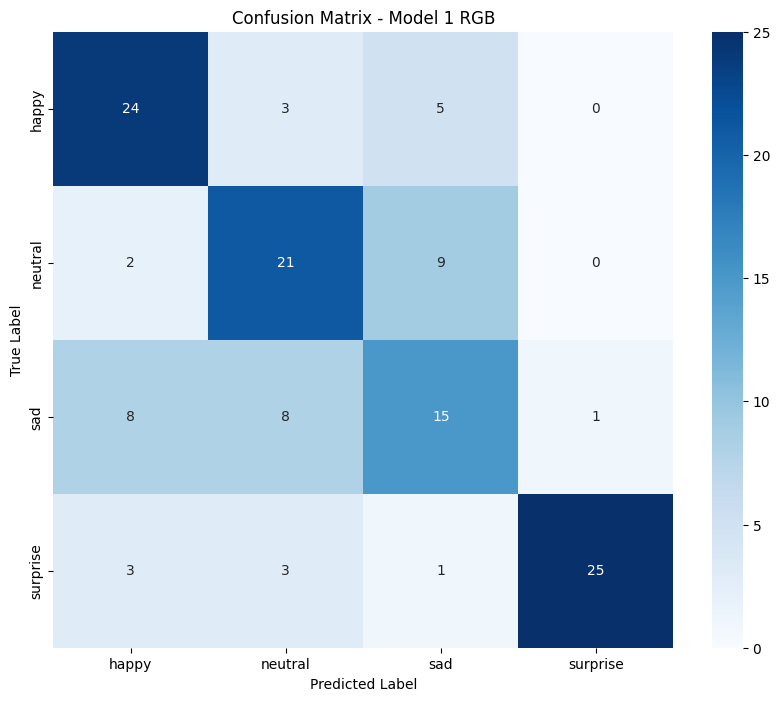

In [33]:
# Printing classification report and confusion matrix for RGB model 1
classification_report_rgb(model_1_rgb, test_set_rgb, model_name="Model 1 RGB")
confusion_matrix_rgb(model_1_rgb, test_set_rgb, model_name="Model 1 RGB")

**Observations and Insights:**
* Note the F1 accuracy score is 66%.
* There is a high range between all metrics with the model performing the best on the 'surprise' class.
* From the confusion matrix, the model makes mistakes with the 'sad' and 'neutral' class.
* 'Happy' class was also misclassified as 'sad' 8 times.
* 'Sad' class had the worst performance metrics.

We will continue testing the same model architecture but this time in grayscale.

In [34]:
# Define a helper function to clear the backend
def clear_keras_backend():
    from tensorflow.keras import backend
    backend.clear_session()

# Clear the backend
clear_keras_backend()

In [35]:
# Setting the seed for reproducibility
np.random.seed(24)
tf.random.set_seed(24)
random.seed(24)

In [36]:
# Creating the Data Loaders for Grayscale images
batch_size  = 32
img_size = 48

# Applying same augmentation techniques as before
datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

# Creating the training set. Note: color_mode is 'grayscale'
train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True,
                                              seed = 24)

# No augmentation applied to validation set
datagen_validation = ImageDataGenerator(rescale=1./255)

# Creating the validation set. Note: color_mode is 'grayscale'
validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

# No augmentation applied to test set
datagen_test = ImageDataGenerator(rescale=1./255)

# Creating the test set. Note: color_mode is 'grayscale'
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

Found 15882 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [37]:
# Defining the same CNN model architecture but changing the input shape to grayscale
def cnn_model_1():

    model = Sequential()
    
    # First Convolutional Block. Note: 1 channel for grayscale
    model.add(Conv2D(64, (2, 2), padding = 'same', input_shape = (48, 48, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Second Convolutional Block
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Third Convolutional Block
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation = 'softmax'))

    return model

model_1 = cnn_model_1()

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,060 (2.31 MB)

 Trainable params: 605,060 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

**Note there are slightly less trainable parameters than the RGB model because of the 1 input channel instead of 3.**

### **Compiling and Training the Model**

In [38]:
# Setting the same callbacks for optimal model saving
checkpoint = ModelCheckpoint("./model_1.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True,
                          mode = 'auto')

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001,
                              mode = 'auto')

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

### **Evaluating the Model on the Test Set**

In [39]:
# Compile the grayscale model
model_1.compile(optimizer = Adam(learning_rate = 0.001), 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

In [40]:
# Train the grayscale model
history_model_1 = model_1.fit(train_set,
                    steps_per_epoch = len(train_set),
                    validation_data = validation_set,
                    validation_steps = len(validation_set),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
495/497 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2695 - loss: 1.3868
Epoch 1: val_accuracy improved from -inf to 0.44585, saving model to ./model_1.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.2696 - loss: 1.3867 - val_accuracy: 0.4459 - val_loss: 1.2684 - learning_rate: 0.0010
Epoch 2/20
495/497 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3994 - loss: 1.2852
Epoch 2: val_accuracy improved from 0.44585 to 0.51778, saving model to ./model_1.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3996 - loss: 1.2851 - val_accuracy: 0.5178 - val_loss: 1.1673 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4746 - loss: 1.1860
Epoch 3: val_accuracy improved from 0.51778 to 0.56118, saving model to ./model_1.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4746 - loss: 1.1860 - val_accuracy: 0.5612 - val_loss: 1.0585 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

**Observations and Insights:**
* Note the model performs the same with about 11 seconds per epoch.

In [41]:
# Evaluate grayscale model 1 on the test set
test_loss, test_accuracy = model_1.evaluate(test_set, steps=len(test_set), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.7466 
Test Accuracy: 0.6641, Test Loss: 0.7734


**Observations and Insights:**
* The grayscale model performed almost exactly the same as the RGB model at ~66% test accuracy.

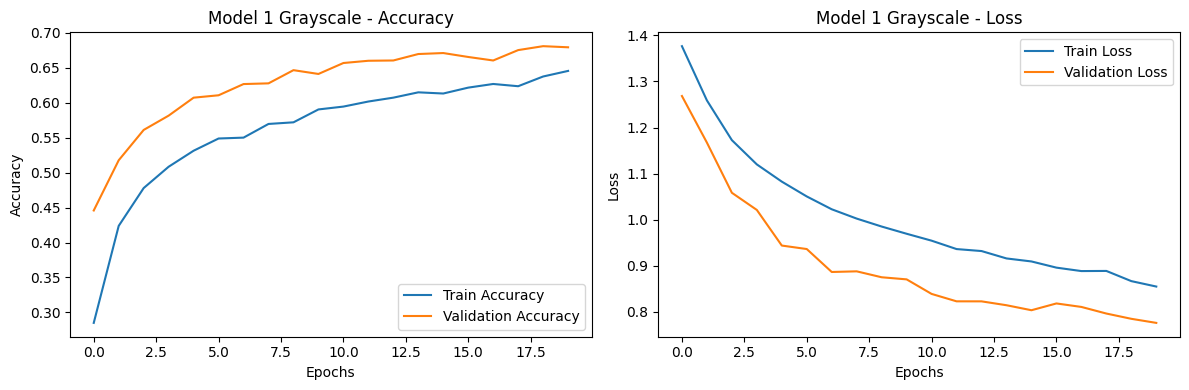

In [42]:
# Plotting the performance of model 1
plot_model_performance(history_model_1, "Model 1 Grayscale")

**Observations and Insights:**
* We can see from the graph that the grayscale model performed poorly with both the training and validation sets, neither scoring at least 70% accuracy. The model did perform better on the validation set however.
* But the grayscale model performed almost exactly like the RGB model.

**Note: we are creating separate classification report and confusion matrix functions for the grayscale models even though they use the same test set, the Data Loaders were different because of the input channels.**

In [43]:
# Function to generate classification report for grayscale model
from sklearn.metrics import classification_report
def classification_report_grayscale(model, test_set, model_name='Model'):

    # Get true labels
    true_labels = test_set.classes
    
    # Get class labels
    target_names = ['happy', 'neutral', 'sad', 'surprise']
    
    # Make predictions
    predictions = model.predict(test_set, steps=len(test_set), verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Generate classification report
    report = classification_report(true_labels, predicted_classes, target_names=target_names)
    print(f'Classification Report - {model_name}:\n')
    print(report)

In [44]:
# Function to generate confusion matrix for grayscale model
from sklearn.metrics import confusion_matrix
def confusion_matrix_grayscale(model, test_set, model_name='Model'):

    # Get true labels
    true_labels = test_set.classes
    
    # Get class labels
    class_labels = list(test_set.class_indices.keys())
    
    # Make predictions
    predictions = model.predict(test_set, steps=len(test_set), verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_classes)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Classification Report - Model 1 Grayscale:

              precision    recall  f1-score   support

       happy       0.67      0.69      0.68        32
     neutral       0.63      0.59      0.61        32
         sad       0.50      0.59      0.54        32
    surprise       0.93      0.78      0.85        32

    accuracy                           0.66       128
   macro avg       0.68      0.66      0.67       128
weighted avg       0.68      0.66      0.67       128



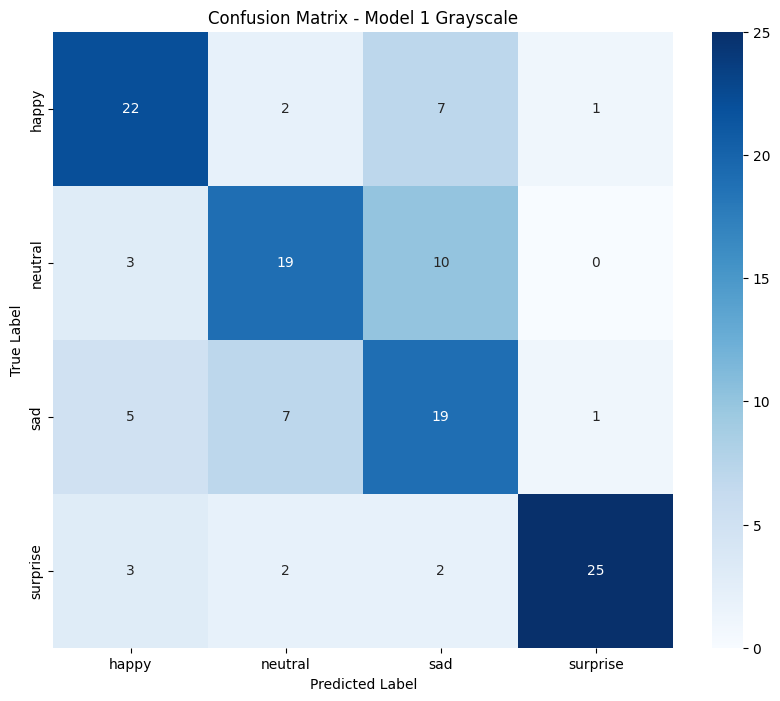

In [45]:
# Printing classification report and confusion matrix for grayscale model 1
classification_report_grayscale(model_1, test_set, model_name="Model 1 Grayscale")
confusion_matrix_grayscale(model_1, test_set, model_name="Model 1 Grayscale")

**Observations and Insights:**
* The grayscale model had the same F1 accuracy score as the RGB model at 66% accuracy.
* There was again high range between all performance metrics.
* The 'sad' class again had the worst performance with the most mistakes, misclassifying as 'neutral' 10 times.
* 'Surprise' class again had the best performance.

### **Creating the second Convolutional Neural Network**

* We will continue to test the RGB input on a slightly larger CNN model to see how it affects performance.

In [46]:
# Clear Keras backend session
clear_keras_backend()

In [47]:
# Setting the random seed for numpy to ensure reproducibility of results
np.random.seed(24)
random.seed(24)
tf.random.set_seed(24)

In [48]:
# Creating the RGB Data Loaders
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set_rgb = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True,
                                              seed = 24)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set_rgb = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set_rgb = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

Found 15882 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [49]:
# Defining the second CNN RGB model
def cnn_model_2_rgb():

    model = Sequential()

    # First Convolutional Block. Note 3 channels for RGB
    model.add(Conv2D(256, (2, 2), padding = 'same', input_shape = (48, 48, 3), activation = 'relu')) 
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(128, (2, 2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(64, (2, 2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Fourth Convolutional Block
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    return model

model_2_rgb = cnn_model_2_rgb()

model_2_rgb.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 256)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,652 (1.49 MB)

 Trainable params: 390,692 (1.49 MB)

 Non-trainable params: 960 (3.75 KB)

**Observations and Insights:**
* Notice despite having more layers, CNN model 2 has less trainable parameters at 390,692.

**Notice we will monitor validation loss with this model to see the performance difference.**

In [50]:
# Setting callbacks for optimal model saving
checkpoint = ModelCheckpoint("./model_2_rgb.keras", 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True,
                          mode = 'auto')

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001,
                              mode = 'auto')

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [51]:
# Compile RGB model 2
model_2_rgb.compile(optimizer = Adam(learning_rate = 0.001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [52]:
# Train RGB model 2
history_model_2_rgb = model_2_rgb.fit(train_set_rgb,
                    steps_per_epoch = len(train_set_rgb),
                    validation_data = validation_set_rgb,
                    validation_steps = len(validation_set_rgb),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3349 - loss: 1.3775
Epoch 1: val_loss improved from inf to 1.25641, saving model to ./model_2_rgb.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 70s 138ms/step - accuracy: 0.3350 - loss: 1.3773 - val_accuracy: 0.4420 - val_loss: 1.2564 - learning_rate: 0.0010
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4792 - loss: 1.1408
Epoch 2: val_loss improved from 1.25641 to 1.04415, saving model to ./model_2_rgb.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 66s 133ms/step - accuracy: 0.4793 - loss: 1.1408 - val_accuracy: 0.5495 - val_loss: 1.0441 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5589 - loss: 1.0028
Epoch 3: val_loss improved from 1.04415 to 0.87302, saving model to ./model_2_rgb.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 66s 132ms/step - accuracy: 0.5589 - loss: 1.0028 - val_accuracy: 0.6283 - val_loss: 0.8730 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 1

**Observations and Insights:**
* Training time per epoch increased to 64 seconds.
* Because of the callbacks, training time/ computational resources were saved as the model stopped training at epoch 13.
* Model weights were restored from the best epoch 10.

In [53]:
# Evaluating RGB model 2 on the test set
test_loss, test_accuracy = model_2_rgb.evaluate(test_set_rgb, steps=len(test_set_rgb), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6979 - loss: 0.6816
Test Accuracy: 0.6641, Test Loss: 0.7389


**Observations and Insights:**
* The 2nd CNN model had the same performance as both versions of the first model with 66% test accuracy.

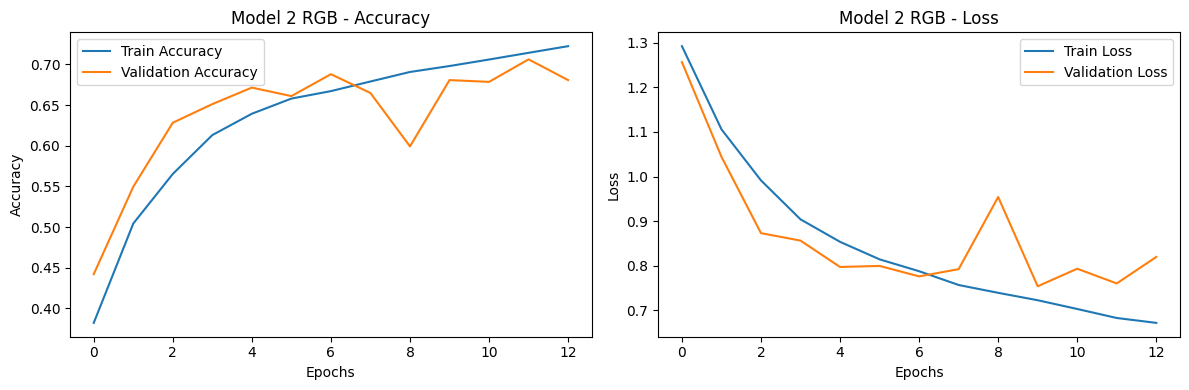

In [54]:
# Plotting RGB model 2 performance
plot_model_performance(history_model_2_rgb, "Model 2 RGB")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classification Report - Model 2 RGB:

              precision    recall  f1-score   support

       happy       0.66      0.78      0.71        32
     neutral       0.50      0.75      0.60        32
         sad       0.67      0.31      0.43        32
    surprise       0.96      0.81      0.88        32

    accuracy                           0.66       128
   macro avg       0.70      0.66      0.66       128
weighted avg       0.70      0.66      0.66       128



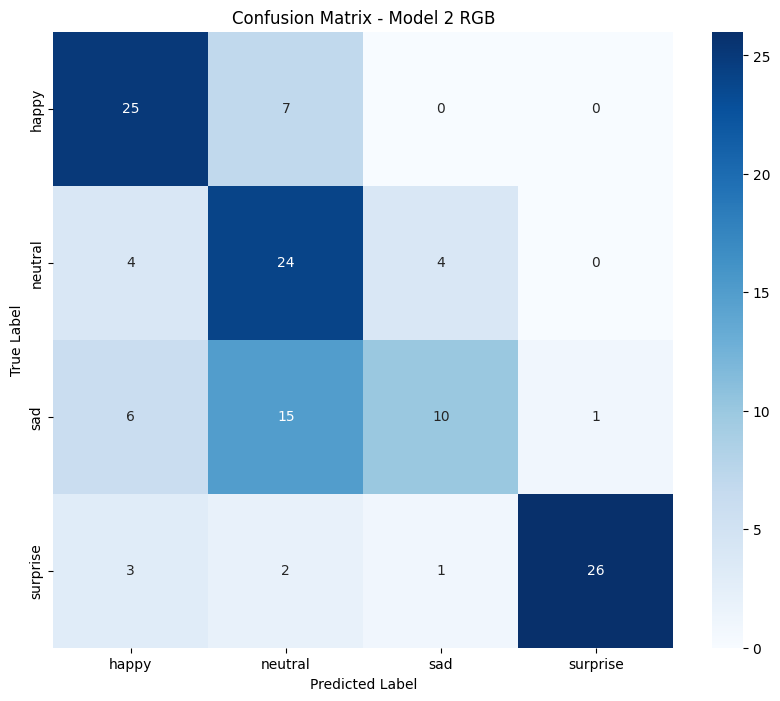

In [55]:
# Printing classification report and confusion matrix for RGB model 2
classification_report_rgb(model_2_rgb, test_set_rgb, model_name="Model 2 RGB")
confusion_matrix_rgb(model_2_rgb, test_set_rgb, model_name="Model 2 RGB")

**Observations and Insights:**
* Very high range between all performance metrics with 'sad' as the worst performing class.
* The most number of misclassifications occur with the 'neutral' class.
* 'Surprise' class is the most accurately classified.


**We'll now try the second CNN model in grayscale to compare performance.**

In [56]:
# Clearing the backend session to free up resources and reset the state of the model
clear_keras_backend()

In [57]:
# Setting the random seed for numpy to ensure reproducibility of results
np.random.seed(24)
random.seed(24)
tf.random.set_seed(24)

In [58]:
# Creating the Data Loaders
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True,
                                              seed = 24)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

Found 15882 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [59]:
# Defining the second CNN grayscale model
def model_2():

    model = Sequential()

    # First Convolutional Block. Note input layer has 1 channel for grayscale
    model.add(Conv2D(256, (2, 2), padding = 'same', input_shape = (48, 48, 1), activation = 'relu')) 
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(128, (2, 2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(64, (2, 2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Fourth Convolutional Block
    model.add(Conv2D(32, (2, 2), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(negative_slope= 0.1))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    return model

model_2 = model_2()

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 256)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,604 (1.49 MB)

 Trainable params: 388,644 (1.48 MB)

 Non-trainable params: 960 (3.75 KB)

### **Compiling and Training the Model**

In [60]:
# Notice we are still monitoring val_loss
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model_2.keras", 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True,
                          mode = 'auto')

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001,
                              mode = 'auto')

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [61]:
# Compile grayscale model 2
model_2.compile(optimizer = Adam(learning_rate = 0.001), 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])

In [62]:
# Train grayscale model 2
history_model_2 = model_2.fit(train_set,
                    steps_per_epoch = len(train_set),
                    validation_data = validation_set,
                    validation_steps = len(validation_set),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3487 - loss: 1.3656
Epoch 1: val_loss improved from inf to 1.25764, saving model to ./model_2.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 68s 135ms/step - accuracy: 0.3488 - loss: 1.3654 - val_accuracy: 0.4149 - val_loss: 1.2576 - learning_rate: 0.0010
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5015 - loss: 1.1151
Epoch 2: val_loss improved from 1.25764 to 1.00917, saving model to ./model_2.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 66s 132ms/step - accuracy: 0.5015 - loss: 1.1151 - val_accuracy: 0.5568 - val_loss: 1.0092 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.5763 - loss: 0.9836
Epoch 3: val_loss improved from 1.00917 to 0.90019, saving model to ./model_2.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 66s 133ms/step - accuracy: 0.5764 - loss: 0.9836 - val_accuracy: 0.6291 - val_loss: 0.9002 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - 

**Observations and Insights:**
* Training time per epoch is about 64 seconds.
* Validation loss did not improve at the 16th epoch so model weights were restored to epoch 13.

### **Evaluating the Model on the Test Set**

In [63]:
# Evaluating model 2 on the test set
test_loss, test_accuracy = model_2.evaluate(test_set, steps=len(test_set), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7354 - loss: 0.6612
Test Accuracy: 0.7188, Test Loss: 0.6866


**Observations and Insights:**
* Grayscale model 2 has the best performance so far with a test accuracy of ~72% and test loss of ~0.69.

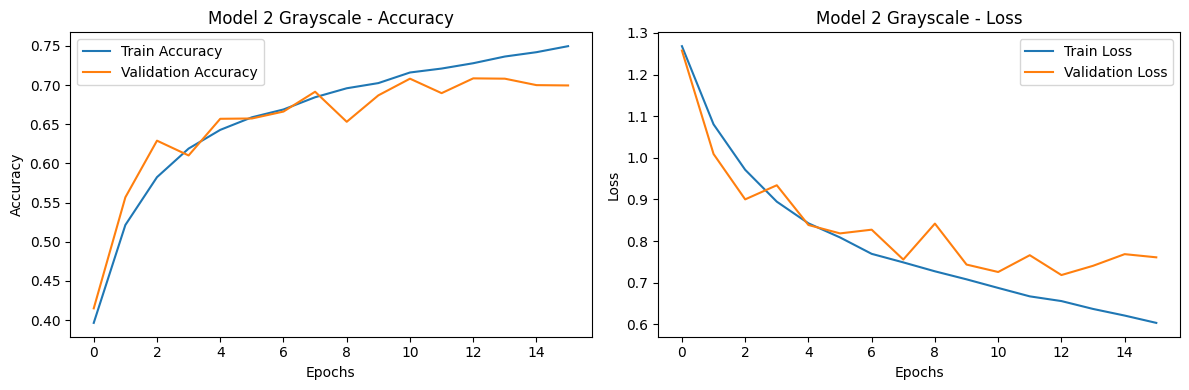

In [64]:
# Plotting model 2 performance
plot_model_performance(history_model_2, "Model 2 Grayscale")

**Observations and Insights:**
* Even though grayscale model 2 performed the best so far, it still slightly overfits with the training set performing better than the validation set.
* The training set achieves ~75% accuracy while the validation set plateaus around ~70%. 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Classification Report - Model 2 Grayscale:

              precision    recall  f1-score   support

       happy       0.74      0.81      0.78        32
     neutral       0.59      0.69      0.64        32
         sad       0.59      0.53      0.56        32
    surprise       1.00      0.84      0.92        32

    accuracy                           0.72       128
   macro avg       0.73      0.72      0.72       128
weighted avg       0.73      0.72      0.72       128



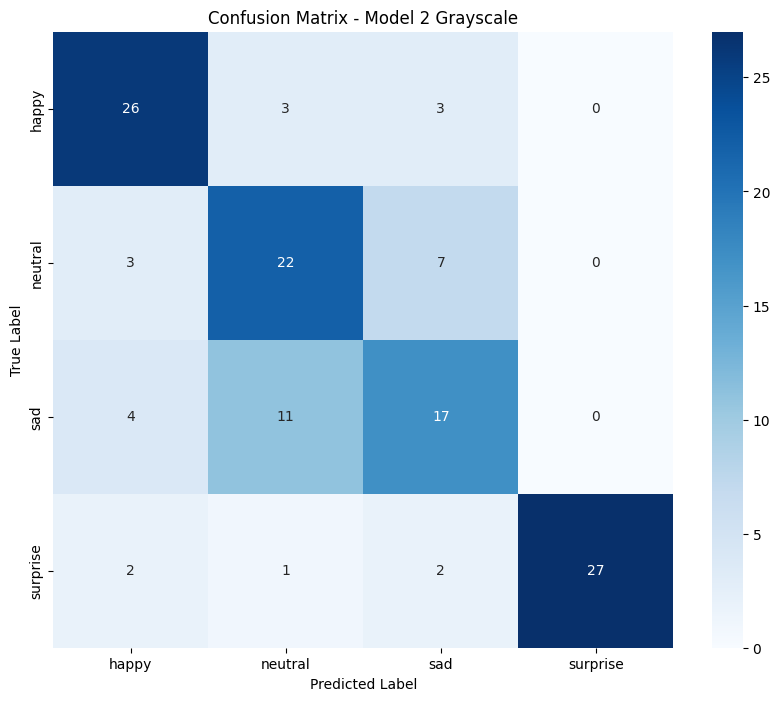

In [65]:
# Printing classification report and confusion matrix for grayscale model 2
classification_report_grayscale(model_2, test_set, model_name="Model 2 Grayscale")
confusion_matrix_grayscale(model_2, test_set, model_name="Model 2 Grayscale")

**Observations and Insights:**
* From the classification report we can see the model performed about 72% F1 accuracy.
* However, there is a high range between all metrics Precision, Recall, and F1-Score meaning the model performed well on some classes and poorly on others. 
* We can see from the confusion matrix that the model struggles to predict 'sad' and 'neutral' classes as those have the most misclassifications.
* Notably, model 2 performed the best on the 'surprise' class which we used augmented images to balance that class with the others.
* So despite the different architectures and input channels, the model has not performed as accurately as desired and struggles to correctly classify 'sad' and 'neutral' classes. 
* 'Surprise' class score 100% on precision which is more or less the general trend of all the models tested so far.
* Choosing the grayscale input channel is clearly the most reasonable assumption as it aligns with the dataset and creates less trainable parameters saving computational resources.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [66]:
# Clear Keras backend session
clear_keras_backend()

In [67]:
# Setting the random seed for numpy to ensure reproducibility of results
np.random.seed(24)
random.seed(24)
tf.random.set_seed(24)

In [68]:
# Creating the Data Loaders for VGG16 model
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set_rgb = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = True,
                                              seed = 24)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set_rgb = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set_rgb = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'neutral', 'sad', 'surprise'],
                                              shuffle = False)

Found 15882 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [69]:
# Load VGG16 model
from tensorflow.keras.applications.vgg16 import VGG16

# Note: include_top=False means we are not including the fully connected layers at the top of the network.
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Observations and Insights:**
* Notice there are close to 15 million trainable parameters in the VGG16 model which will take too long to train so we will freeze the layers and select a block to build our model on.
* We are also using the ImageNet weights.

### **Model Building**

In [70]:
# Extracting the transfer layer and freezing the VGG16 model
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Flattening the output from the block5_pool layer of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with Dropout ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

# Initializing the model
vggmodel = Model(vgg.input, pred)

vggmodel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           25

 Total params: 14,887,684 (56.79 MB)

 Trainable params: 172,868 (675.27 KB)

 Non-trainable params: 14,714,816 (56.13 MB)

**Observations and Insights:**
* Note after freezing the layers there are only 172,868 trainable parameters instead of almost 15 million.

### **Compiling and Training the VGG16 Model**

In [71]:
# Setting the same callbacks for RGB model. Note: we are monitoring val_accuracy
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [72]:
# Compile the VGG model
vggmodel.compile(optimizer = Adam(learning_rate = 0.001), 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'])

In [73]:
# Train the VGG model
history_vggmodel = vggmodel.fit(train_set_rgb,
                    steps_per_epoch = len(train_set_rgb),
                    validation_data = validation_set_rgb,
                    validation_steps = len(validation_set_rgb),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3449 - loss: 1.4340
Epoch 1: val_accuracy improved from -inf to 0.43721, saving model to ./vggmodel.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 68s 136ms/step - accuracy: 0.3450 - loss: 1.4338 - val_accuracy: 0.4372 - val_loss: 1.2123 - learning_rate: 0.0010
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4358 - loss: 1.2283
Epoch 2: val_accuracy improved from 0.43721 to 0.50573, saving model to ./vggmodel.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 68s 136ms/step - accuracy: 0.4358 - loss: 1.2283 - val_accuracy: 0.5057 - val_loss: 1.1306 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4626 - loss: 1.1851
Epoch 3: val_accuracy improved from 0.50573 to 0.52461, saving model to ./vggmodel.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 67s 135ms/step - accuracy: 0.4626 - loss: 1.1851 - val_accuracy: 0.5246 - val_loss: 1.0948 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 

**Observations and Insights:**
* Despite the low number of trainable parameters, the model takes very long to compute at about 67 seconds per epoch.
* Validation accuracy did not increase passed the 13th epoch so the weights were restored from epoch 10.

### **Evaluating the VGG16 model**

In [74]:
# Evaluate the VGG model
test_loss, test_accuracy = vggmodel.evaluate(test_set_rgb, steps=len(test_set_rgb), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5125 - loss: 1.1320
Test Accuracy: 0.5078, Test Loss: 1.1209


**Observations and Insights:**
* The VGG model performed the worst of all the models so far with a test accuracy of ~51%.
* This is consistent with the RGB models.

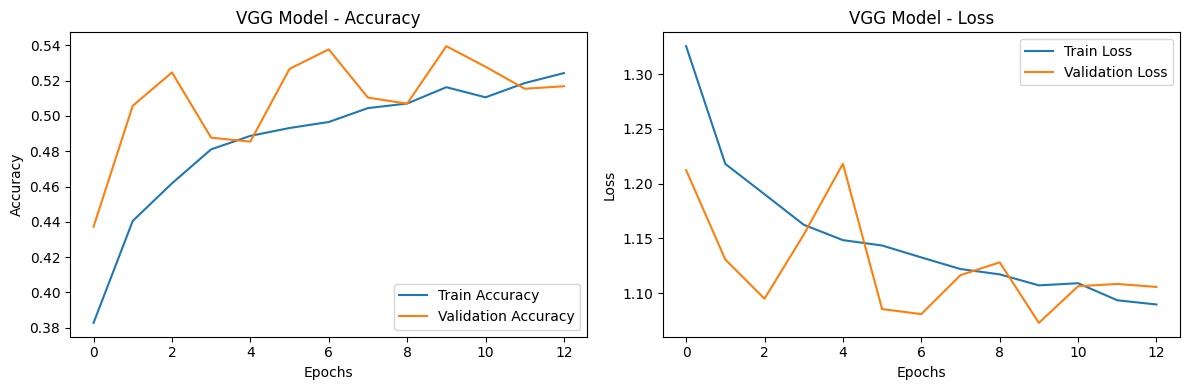

In [75]:
# Plotting the performance of VGG model
plot_model_performance(history_vggmodel, "VGG Model")

**Observations and Insights:**
* Notice the high volatility in the validation accuracy peaking at about ~54% which is not good.
* There is also high volatility in validation loss.
* Training accuracy performed worsed until the end.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Classification Report - VGG Model:

              precision    recall  f1-score   support

       happy       0.50      0.50      0.50        32
     neutral       0.37      0.59      0.46        32
         sad       0.54      0.41      0.46        32
    surprise       0.81      0.53      0.64        32

    accuracy                           0.51       128
   macro avg       0.56      0.51      0.52       128
weighted avg       0.56      0.51      0.52       128



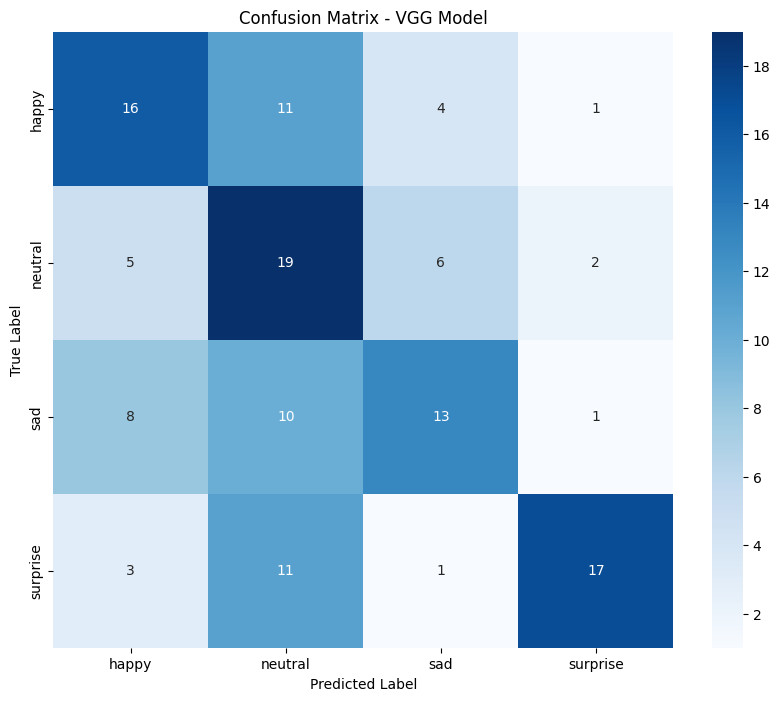

In [76]:
# Printing the classification report and confusion matrix for VGG model
classification_report_rgb(vggmodel, test_set_rgb, model_name="VGG Model")
confusion_matrix_rgb(vggmodel, test_set_rgb, model_name="VGG Model")

**Observations and Insights:**
* There is a large number of misclassifications in the 'neutral' class
* This model struggled with the 'happy', 'sad', and 'neutral' classes.
* The model performance has been poor using RGB as the color mode thus far even with the VGG16 architecture.

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

## **ResNet V2 Model**

In [77]:
# Clear Keras backend session
clear_keras_backend()

In [78]:
# Load ResNet101 model
import tensorflow.keras.applications as ap

resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [79]:
# Building the ResNet model
transfer_layer_resnet = resnet.get_layer('conv5_block3_add')
resnet.trainable=False

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation = 'relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(resnet.input, pred) # Initializing the model

resnetmodel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 54, 54, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 24, 24,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 24, 24,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 24, 24,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 26, 26,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 12, 12,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 12, 12,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 12, 12,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 12, 12,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 12, 12,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 12, 12,    │      1,024 │ conv2_block1_3_c

 Total params: 44,797,252 (170.89 MB)

 Trainable params: 2,138,948 (8.16 MB)

 Non-trainable params: 42,658,304 (162.73 MB)

**Observations and Insights:**
* The ResNet model has the most number of total parameters at almost 45 million.
* After freezing layers, selecting a convolutional block to build off of, and adding our own layers, the final model still has a high number of trainable parameters at 2,138,948 relative to the other models we've trained thus far.

### **Compiling and Training the Model**

In [80]:
# Setting the callbacks for optimal model saving
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./resnetmodel.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [81]:
# Compile the ResNet model
resnetmodel.compile(optimizer = Adam(learning_rate = 0.001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [82]:
# Train the ResNet model
history_resnetmodel = resnetmodel.fit(train_set_rgb,
                    steps_per_epoch = len(train_set_rgb),
                    validation_data = validation_set_rgb,
                    validation_steps = len(validation_set_rgb),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2553 - loss: 1.5349
Epoch 1: val_accuracy improved from -inf to 0.36669, saving model to ./resnetmodel.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 76s 144ms/step - accuracy: 0.2553 - loss: 1.5348 - val_accuracy: 0.3667 - val_loss: 1.3530 - learning_rate: 0.0010
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.2550 - loss: 1.4105
Epoch 2: val_accuracy did not improve from 0.36669
497/497 ━━━━━━━━━━━━━━━━━━━━ 71s 142ms/step - accuracy: 0.2550 - loss: 1.4105 - val_accuracy: 0.3667 - val_loss: 1.3856 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2477 - loss: 1.4053
Epoch 3: val_accuracy did not improve from 0.36669
497/497 ━━━━━━━━━━━━━━━━━━━━ 70s 141ms/step - accuracy: 0.2477 - loss: 1.4053 - val_accuracy: 0.2285 - val_loss: 1.3728 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2445 - loss: 1.4003
Epoch 4: val_accuracy did

**Observations and Insights:**
* This model had the earliest stop at epoch 4 and also had terrible training/validation accuracy.

### **Evaluating the ResNet Model**

In [83]:
# Evaluate the ResNet model
test_loss, test_accuracy = resnetmodel.evaluate(test_set_rgb, steps=len(test_set_rgb), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4667 - loss: 1.3043
Test Accuracy: 0.2500, Test Loss: 1.4043


**Observations and Insights:**
* The model achieved 25% test accuracy which is the lowest of all the models.

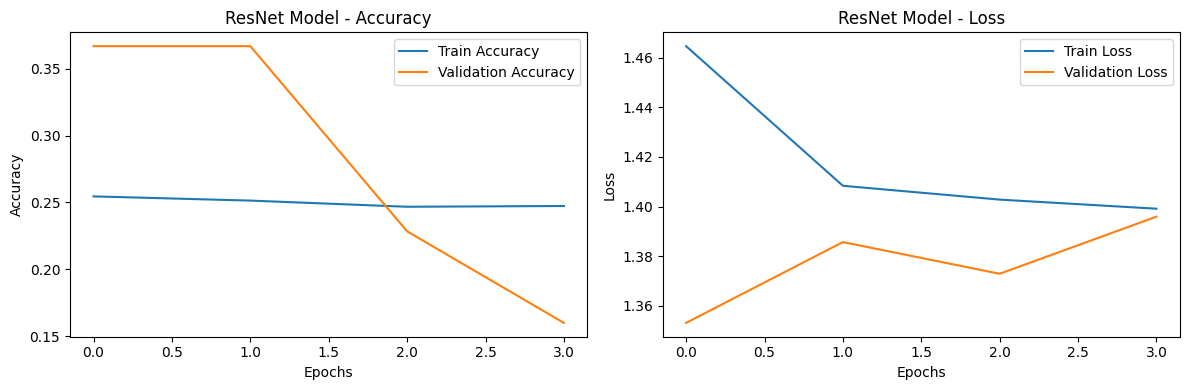

In [84]:
# Plotting the performance of Resnet model 
plot_model_performance(history_resnetmodel, "ResNet Model")

**Observations and Insights:**
* The model started at slightly above 35% training accuracy then declined from there before eventually stopping early.
* Notice training accuracy maintained at about 25%.
* Training loss was improving while validation loss was worsening.

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
Classification Report - ResNet Model:

              precision    recall  f1-score   support

       happy       0.25      1.00      0.40        32
     neutral       0.00      0.00      0.00        32
         sad       0.00      0.00      0.00        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



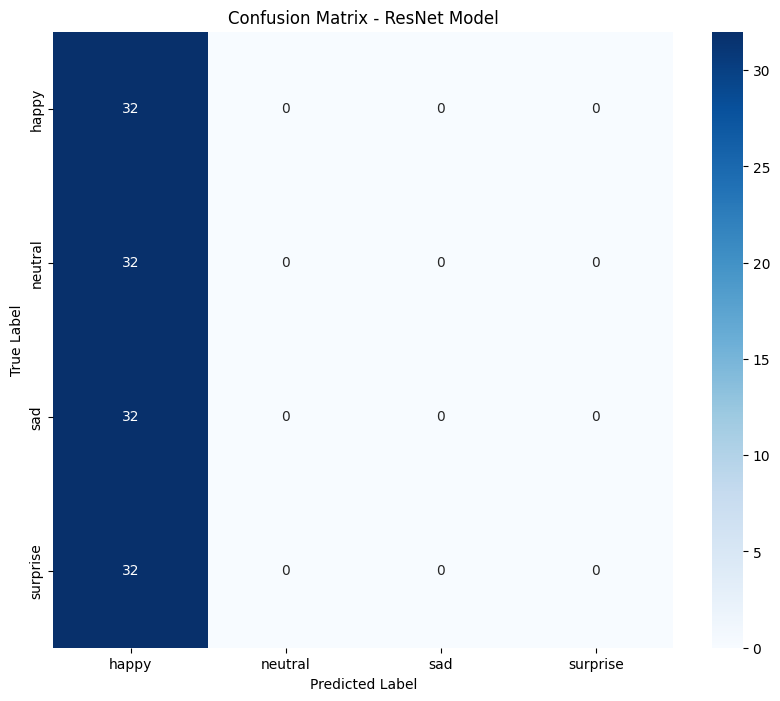

In [85]:
# Printing the classification report and confusion matrix for ResNet model
classification_report_grayscale(resnetmodel, test_set_rgb, model_name="ResNet Model")
confusion_matrix_grayscale(resnetmodel, test_set_rgb, model_name="ResNet Model")

**Observations and Insights:**

* Because of the high number of trainable parameters, the model is fitting extremely slow and exhausting computational resources while also not acheiving good performance.
* Model performance has only worsened, this time not even acheiving 25% accuracy on the validation set.
* The early stopping is saving considerable resources.
* Note the confusion matrix where the model predicted every label as 'happy' (we used the same Data Loaders from the VGG16 model).

## **EfficientNet Model**

In [86]:
# Clear Keras backend session
clear_keras_backend()

In [87]:
# Load the EfficientNet Model
efficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [88]:
transfer_layer_efficientNet = efficientNet.get_layer('block6e_expand_activation')
efficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_efficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)  # Dense layer with 256 neurons
x = Dropout(0.3)(x)                   # Dropout layer with 30% dropout rate
x = Dense(128, activation='relu')(x)  # Dense layer with 128 neurons
x = BatchNormalization()(x)           # Batch Normalization layer
x = Dense(64, activation='relu')(x)   # Dense layer with 64 neurons

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation='softmax')(x)

# Initialize the model
efficientnetmodel = Model(efficientNet.input, pred)

efficientnetmodel.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 48, 48, 3) │          0 │ input_layer[0][0] │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 48, 48, 3) │          0 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 24, 24,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 24, 24,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 24, 24,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 24, 24,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 24, 24,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 24, 24,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 24, 24,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 24, 24,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 24, 24,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 24, 24,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 12, 12,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 12, 12,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 12, 12,    │          0 │ block2a_expand_b

 Total params: 6,021,738 (22.97 MB)

 Trainable params: 1,319,876 (5.03 MB)

 Non-trainable params: 4,701,862 (17.94 MB)

**Observations and Insights:**
* The EfficientNet model has a reasonable amount of trainable parameters at 1,319,876.
* We're also using the same Data Loaders as the previous two transfer learning models as they all have RGB inputs.

### **Compiling and Training the Model**

In [89]:
# Setting the callbacks for optimal model saving 
checkpoint = ModelCheckpoint("./efficientnetmodel.keras", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [90]:
# Compiling the EfficientNet model
efficientnetmodel.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [91]:
# Train the EfficientNet model
history_efficientnetmodel = efficientnetmodel.fit(train_set_rgb,
                    steps_per_epoch = len(train_set_rgb),
                    validation_data = validation_set_rgb,
                    validation_steps = len(validation_set_rgb),
                    epochs = epochs,
                    callbacks = callbacks_list)

Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2482 - loss: 1.4934
Epoch 1: val_accuracy improved from -inf to 0.22885, saving model to ./efficientnetmodel.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - accuracy: 0.2483 - loss: 1.4933 - val_accuracy: 0.2289 - val_loss: 1.3782 - learning_rate: 0.0010
Epoch 2/20
496/497 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2477 - loss: 1.4161
Epoch 2: val_accuracy improved from 0.22885 to 0.24432, saving model to ./efficientnetmodel.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.2477 - loss: 1.4160 - val_accuracy: 0.2443 - val_loss: 1.3808 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2480 - loss: 1.4032
Epoch 3: val_accuracy did not improve from 0.24432
497/497 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.2480 - loss: 1.4032 - val_accuracy: 0.2289 - val_loss: 1.3840 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0

**Observations and Insights:**
* Training time per epoch is fast at about 20 seconds.
* Again, the model performed extremely poor and stopped early at the 4th epoch, restoring weights from epoch 1.

### **Evaluating the EfficientnetNet Model**

In [92]:
# Evaluate the EfficientNet model
test_loss, test_accuracy = efficientnetmodel.evaluate(test_set_rgb, steps=len(test_set_rgb), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1667 - loss: 1.3765   
Test Accuracy: 0.2500, Test Loss: 1.3898


**Observations and Insights:**
* Notice similar performance to the ResNet model at 25% test accuracy.

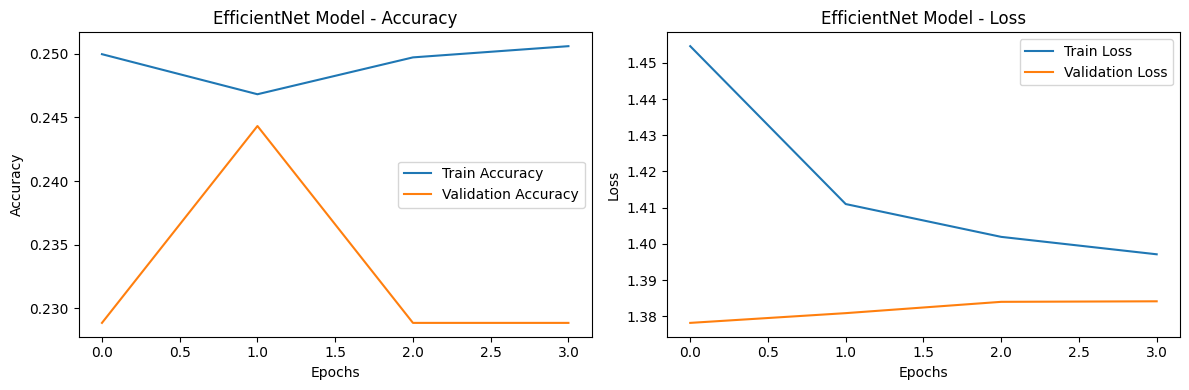

In [93]:
# Plotting the performance of the EfficientNet model
plot_model_performance(history_efficientnetmodel, "EfficientNet Model")

**Observations and Insights:**
* This model severely overfit with training accuracy maintaining about 25%.
* Validation accuracy was very low starting from ~23%, spiking to ~24%, then returning to under ~23%.
* Again training loss seemed to be improving with validation loss worsening. 


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Classification Report - EfficientNet Model:

              precision    recall  f1-score   support

       happy       0.00      0.00      0.00        32
     neutral       0.00      0.00      0.00        32
         sad       0.25      1.00      0.40        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



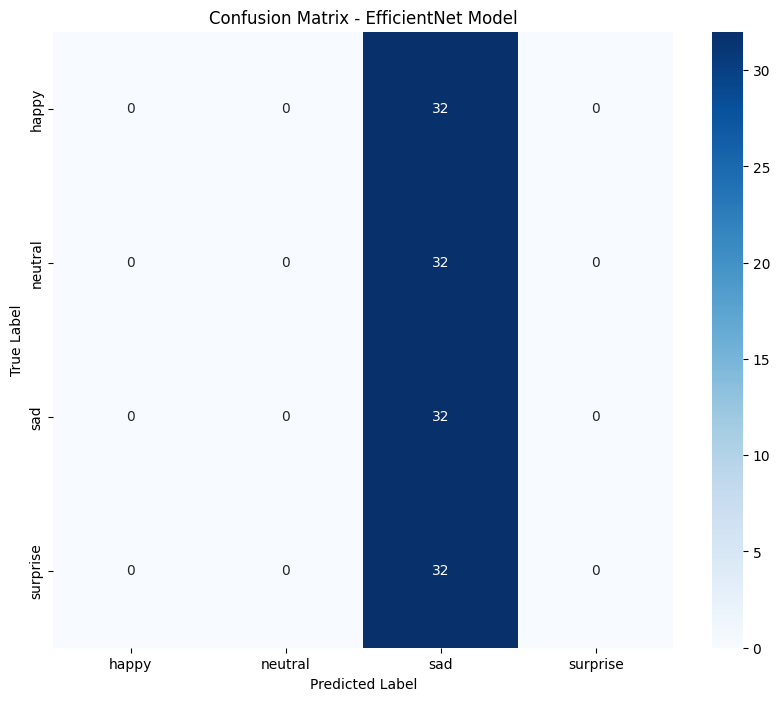

In [94]:
# Printing the classification report and confusion matrix for EfficientNet model
classification_report_grayscale(efficientnetmodel, test_set_rgb, model_name="EfficientNet Model")
confusion_matrix_grayscale(efficientnetmodel, test_set_rgb, model_name="EfficientNet Model")

**Observations and Insights:**
* Similar to the ResNet model where it only predicted one class, the EfficientNet model also only predicted 'sad' class.
* This model achieved an F1 accuracy score of 25%.
* The transfer learning models were the worst performing models. This is due to the models being trained on RGB channels and the dataset we are classifying is in grayscale so these two do not align and reflects in the performance.
* The best performance we've achieved thus is far is by using grayscale Data Loaders and a grayscale model.

### **Why Transfer Learning Models Performed Poorly**

Transfer learning models like **VGG16, ResNet**, and **EfficientNet** performed poorly due to the **mismatch between their pre-trained RGB weights and the grayscale dataset**. These models were trained on RGB datasets (e.g., ImageNet), which rely on color-based features absent in grayscale images. This mismatch led to:

* **Loss of Feature Relevance:** Pre-trained weights failed to extract meaningful features from grayscale images.
* **Overfitting or Underfitting:** Models struggled to adapt to grayscale inputs, resulting in poor generalization.
* **Unnecessary Complexity:** RGB-based architectures introduced redundant parameters, increasing computational cost without improving performance.

### **Suggestions for Adapting Transfer Learning Models to Grayscale Datasets**
**1. Modify Input Layers:**
* Replace the input layer to accept a single grayscale channel (input_shape=(height, width, 1)).
* Duplicate the grayscale channel to create pseudo-RGB input (input_shape=(height, width, 3)).

**2. Fine-Tune on Grayscale Images:**
* Freeze initial layers and retrain deeper layers on grayscale data.
* Use a smaller learning rate for gradual weight adjustment.

**3. Pre-Train on Grayscale Data:**
* Pre-train the model on a large grayscale dataset (e.g., FER2013) before fine-tuning.

**4. Custom Feature Extraction:**
* Add grayscale-specific convolutional layers before the pre-trained model to extract relevant features.

**5. Data Augmentation:**
* Apply grayscale-specific augmentations (e.g., brightness, contrast adjustments) to improve generalization.

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [130]:
# Clear Keras backend session
clear_keras_backend()

In [131]:
# Setting the random seed for numpy to ensure reproducibility of results
np.random.seed(24)
random.seed(24)
tf.random.set_seed(24)

### **Model Building**

In [132]:
# Setting the Data Loaders
img_size = 48
batch_size = 32
epochs = 50 # Increased epochs for longer training
folder_path = "Facial_emotion_images/"

# Enhanced data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    shear_range=0.15)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'neutral', 'sad', 'surprise'],
    shuffle=True,
    seed=24)

# Only rescaling for validation and test sets
datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'neutral', 'sad', 'surprise'],
    shuffle=False)


datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'neutral', 'sad', 'surprise'],
    shuffle=False)

Found 15882 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [133]:
# Define the grayscale CNN model 3
def model_3():
    model = Sequential()
    
    # First convolutional block - 32 filters
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Second convolutional block - 64 filters
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Third convolutional block - 128 filters
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    
    return model

# Print model summary
model_3 = model_3()
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,503,076 (5.73 MB)

 Trainable params: 1,501,412 (5.73 MB)

 Non-trainable params: 1,664 (6.50 KB)

**Observations and Insights:**
* This model has 1,501,412 trainable parameters.
* We've increased the data augmentations on the training set as well as increased the number of epochs. The goal is to achieve better accuracy without exhausting too much computational resources.

### **Compiling and Training the Model**

In [99]:
# Set up callbacks. Notice we are monitoring val_accuracy
from keras.callbacks import CSVLogger

checkpoint = ModelCheckpoint("./model_3.keras",
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                            patience=15,
                            verbose=1,
                            restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=5,
                            min_lr=0.00001,
                            verbose=1)

csv_logger = CSVLogger('model_3_training_log.csv', append=True)

callbacks = [checkpoint, early_stopping, reduce_lr, csv_logger]

In [134]:
# Compile the grayscale CNN model 3
model_3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [101]:
# Train the grayscale CNN model 3
history_model_3 = model_3.fit(
    train_set,
    steps_per_epoch=len(train_set),
    validation_data=validation_set,
    validation_steps=len(validation_set),
    epochs=epochs,
    callbacks=callbacks)

Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2822 - loss: 1.9247
Epoch 1: val_accuracy improved from -inf to 0.25578, saving model to ./model_3.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 44s 84ms/step - accuracy: 0.2822 - loss: 1.9242 - val_accuracy: 0.2558 - val_loss: 1.3846 - learning_rate: 0.0010
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3319 - loss: 1.3939
Epoch 2: val_accuracy improved from 0.25578 to 0.38778, saving model to ./model_3.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.3319 - loss: 1.3938 - val_accuracy: 0.3878 - val_loss: 1.2518 - learning_rate: 0.0010
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3945 - loss: 1.2631
Epoch 3: val_accuracy improved from 0.38778 to 0.41692, saving model to ./model_3.keras
497/497 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.3945 - loss: 1.2631 - val_accuracy: 0.4169 - val_loss: 1.2084 - learning_rate: 0.0010
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/s

**Observations and Insights:**
* Training time per epoch is about ~44 seconds which is pretty good considering the number of parameters.
* Since the early stopping callback was set with a patience of 15 epochs, it allowed the model time to improve and completed all 50 epochs.

### **Evaluating the Model on Test Set**

In [102]:
# Evaluate model 3 on the test set
test_loss, test_accuracy = model_3.evaluate(test_set, steps=len(test_set), verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8240 - loss: 0.4779
Test Accuracy: 0.8203, Test Loss: 0.5129


**Observations and Insights:**
* This model achieved the highest test accuracy at ~82%.

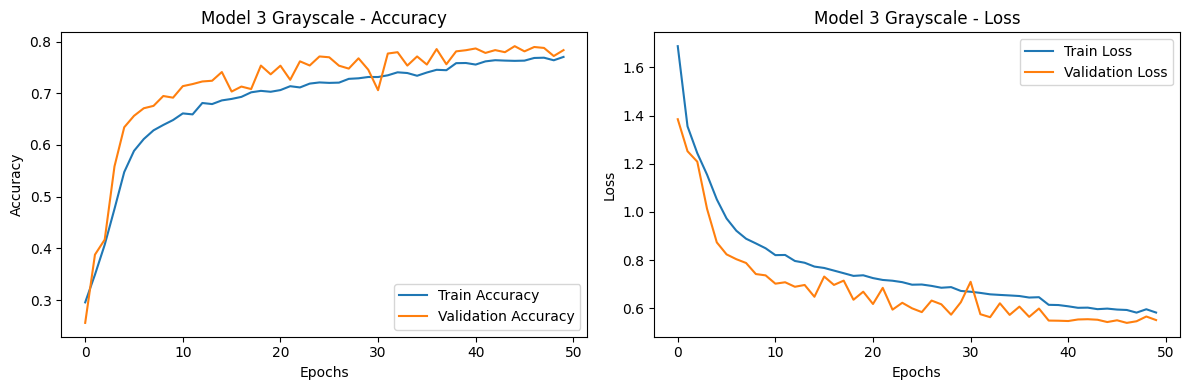

In [103]:
# Plotting the performance of model 3
plot_model_performance(history_model_3, "Model 3 Grayscale")

**Observations and Insights:**
* Notice the general trend for the training/validation accuracy was up and this model fit much better comparatively. 
* This model also achieved the best training/validation loss at close to ~0.6.
* The model performed better on the test set than the training and validation sets.

### **Plotting the Confusion Matrix for the chosen final model**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report - Model 3 Grayscale:

              precision    recall  f1-score   support

       happy       0.93      0.84      0.89        32
     neutral       0.73      0.84      0.78        32
         sad       0.76      0.69      0.72        32
    surprise       0.88      0.91      0.89        32

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.82      0.82      0.82       128



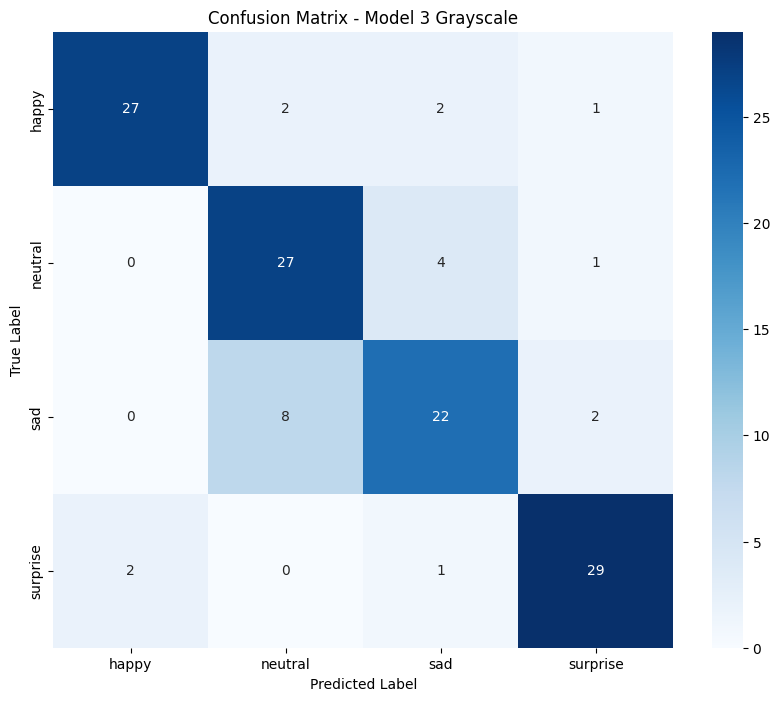

In [104]:
# Printing classification report and confusion matrix for model 3
classification_report_grayscale(model_3, test_set, model_name="Model 3 Grayscale")
confusion_matrix_grayscale(model_3, test_set, model_name="Model 3 Grayscale")

**Observations and Insights:**
* This model still did have issues with the 'neutral' and 'sad' classes which makes sense as all of the models did and there weren't many distinct features between the two classes.
* 'Surprise' class performed the best with the least amount of misclassifications.
* The range between all performance metrics was less than the other models.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


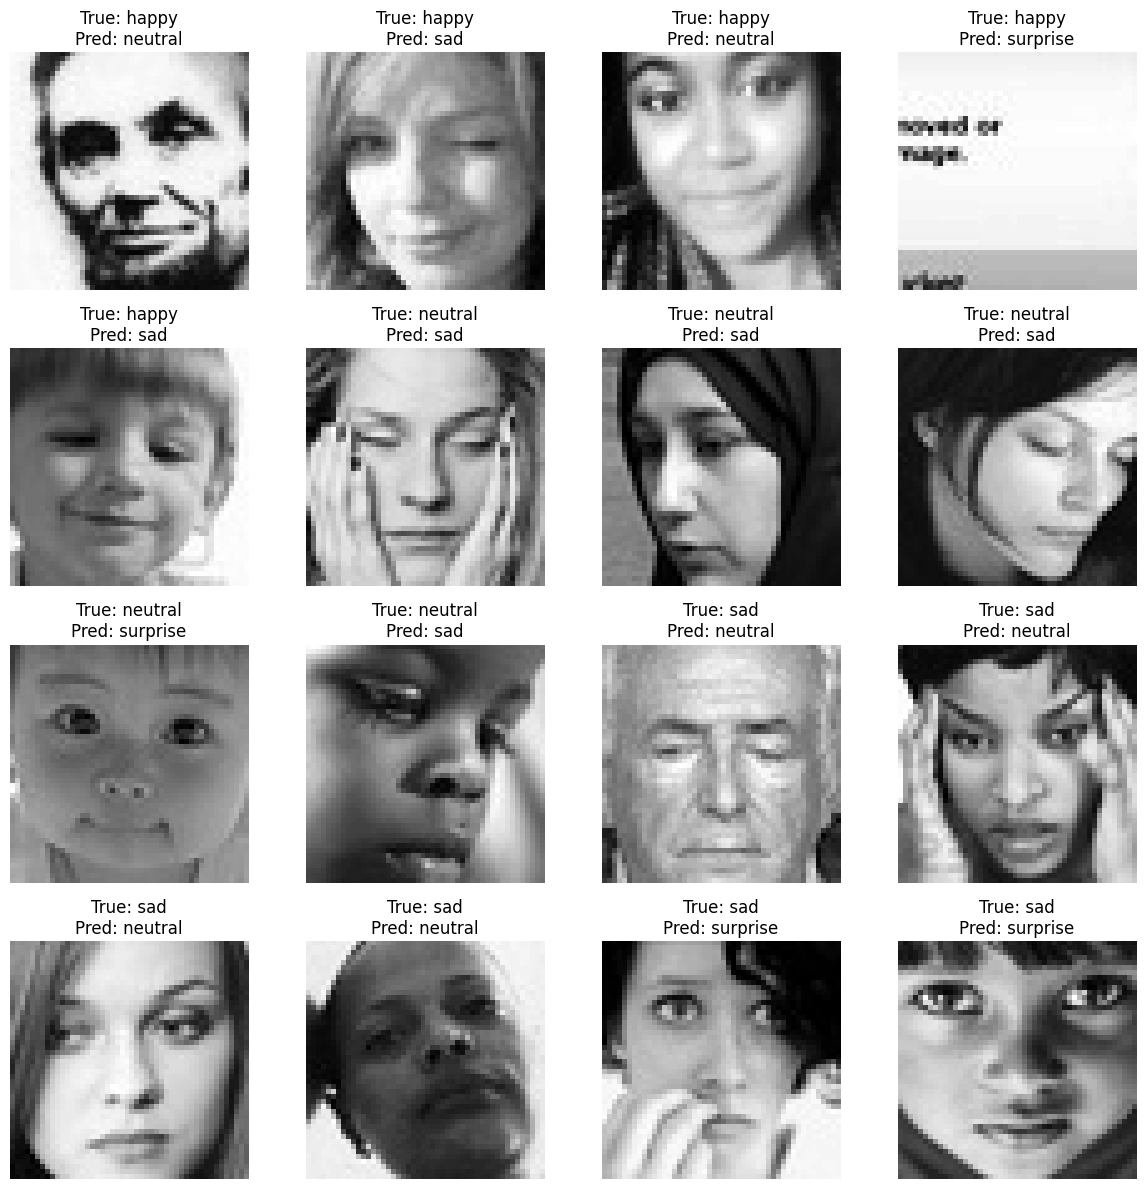

In [105]:
# Visualizing misclassified images
y_true = test_set.classes
y_pred = np.argmax(model_3.predict(test_set), axis=1)
misclassified_indices = np.where(y_true != y_pred)[0]

class_labels = list(test_set.class_indices.keys())  # Convert dict_keys to a list

plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:16]):  # Display up to 16 misclassified images
    img_path = test_set.filepaths[idx]
    img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

**Observations and Insights:**
* We can see from this misclassifications that model 3 mostly predicted either 'sad' or 'neutral' when the true label was 'happy'.
* However some of these images are ambiguous so hard to distinguish a specific emotion.
* One image does not even have a face, yet a prediction was made that affects performance metrics so need to do a deeper clean of dataset to improve performance.

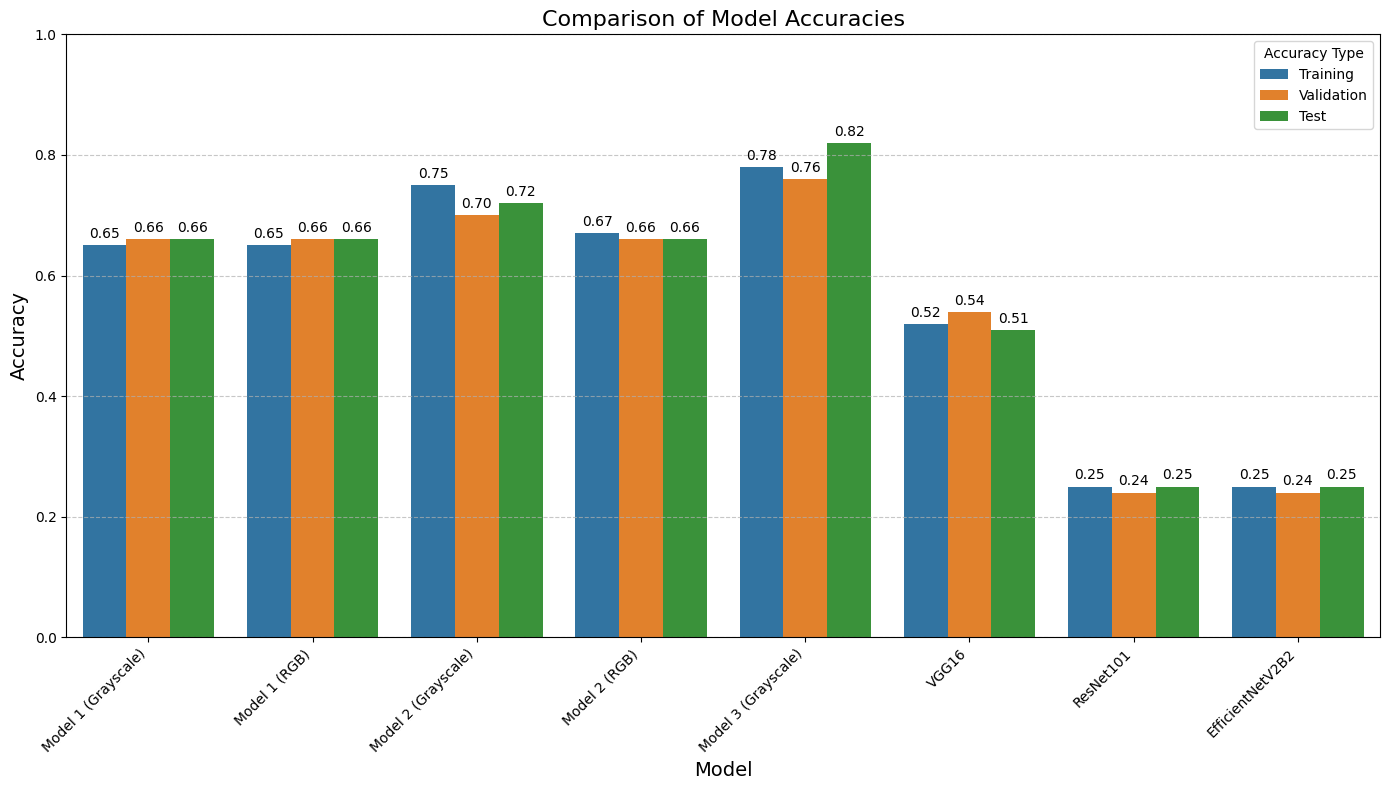

In [106]:
# Visualizing the performance of all models

# Define the model names
models = [
    'Model 1 (Grayscale)', 
    'Model 1 (RGB)', 
    'Model 2 (Grayscale)', 
    'Model 2 (RGB)',
    'Model 3 (Grayscale)',
    'VGG16',
    'ResNet101',
    'EfficientNetV2B2']

# Define the accuracies for each model
# These values are extracted from the notebook
# Format: [training_accuracy, validation_accuracy, test_accuracy]
accuracies = {
    'Model 1 (Grayscale)': [0.65, 0.66, 0.66],
    'Model 1 (RGB)': [0.65, 0.66, 0.66],
    'Model 2 (Grayscale)': [0.75, 0.70, 0.72],
    'Model 2 (RGB)': [0.67, 0.66, 0.66],
    'Model 3 (Grayscale)': [0.78, 0.76, 0.82],
    'VGG16': [0.52, 0.54, 0.51],
    'ResNet101': [0.25, 0.24, 0.25],
    'EfficientNetV2B2': [0.25, 0.24, 0.25]
}

# Create a DataFrame for easier plotting
data = []
for model in models:
    train_acc, val_acc, test_acc = accuracies[model]
    data.append({'Model': model, 'Accuracy Type': 'Training', 'Accuracy': train_acc})
    data.append({'Model': model, 'Accuracy Type': 'Validation', 'Accuracy': val_acc})
    data.append({'Model': model, 'Accuracy Type': 'Test', 'Accuracy': test_acc})

df = pd.DataFrame(data)

# Create the figure and axes
plt.figure(figsize=(14, 8))

# Create the grouped bar chart
ax = sns.barplot(x='Model', 
                 y='Accuracy', 
                 hue='Accuracy Type', 
                 data=df)

# Customize the plot
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Accuracy Type', loc='upper right')

plt.show()


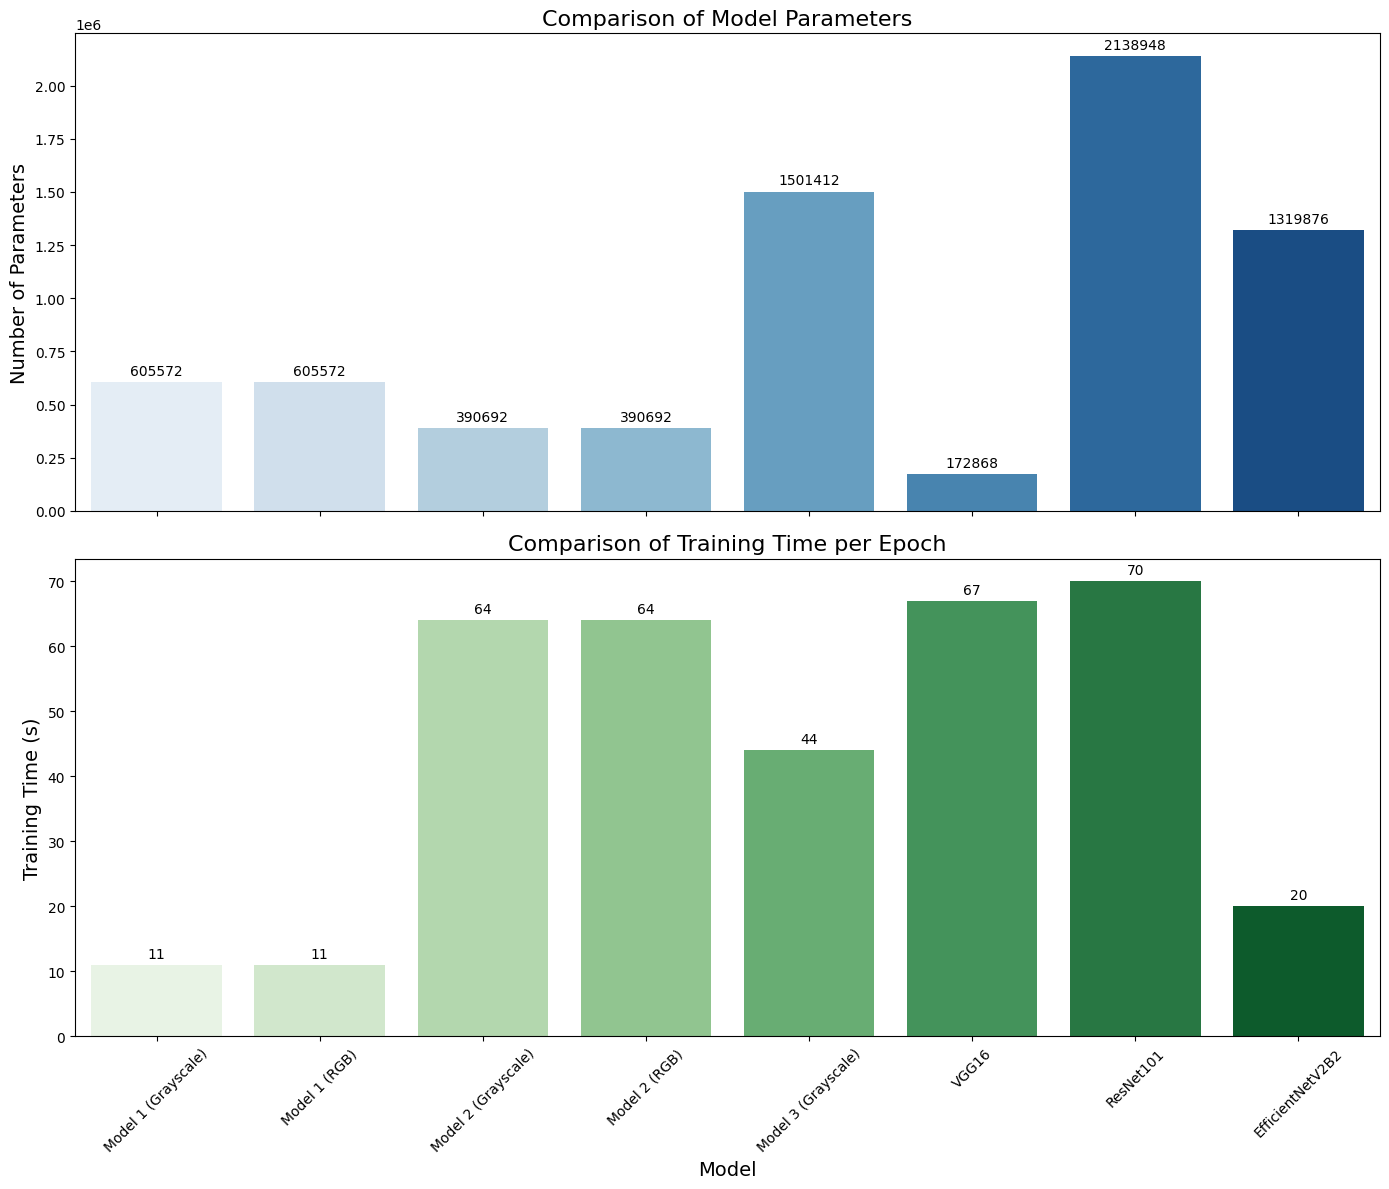

In [137]:
# Visualizing the model parameters and training time

# Define the metrics for each model
# Format: [parameters, training_time_per_epoch]
metrics = {
    'Model 1 (Grayscale)': [605572, 11],
    'Model 1 (RGB)': [605572, 11],
    'Model 2 (Grayscale)': [390692, 64],
    'Model 2 (RGB)': [390692, 64],
    'Model 3 (Grayscale)': [1501412, 44],
    'VGG16': [172868, 67],
    'ResNet101': [2138948, 70],
    'EfficientNetV2B2': [1319876, 20]
}

# Create a DataFrame for easier visualization
data = []
for model, values in metrics.items():
    params, time = values
    data.append({'Model': model, 'Metric': 'Parameters', 'Value': params})
    data.append({'Model': model, 'Metric': 'Training Time (s)', 'Value': time})

df = pd.DataFrame(data)

# Separate the data for parameters and training time
params_data = df[df['Metric'] == 'Parameters']
time_data = df[df['Metric'] == 'Training Time (s)']

# Create subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot parameters
sns.barplot(ax=axes[0], x='Model', y='Value', data=params_data, palette='Blues')
axes[0].set_title('Comparison of Model Parameters', fontsize=16)
axes[0].set_ylabel('Number of Parameters', fontsize=14)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=3)

# Plot training time
sns.barplot(ax=axes[1], x='Model', y='Value', data=time_data, palette='Greens')
axes[1].set_title('Comparison of Training Time per Epoch', fontsize=16)
axes[1].set_xlabel('Model', fontsize=14)
axes[1].set_ylabel('Training Time (s)', fontsize=14)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=3)

# Rotate x-axis labels for better readability
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

## **Conclusion**

**1. Class Distribution Imbalance:**
* The dataset is imbalanced, with the 'surprise' class having significantly fewer samples compared to the other classes ('happy', 'neutral', and 'sad'). This imbalance can lead to biased model predictions favoring the majority classes.
* Addressing this imbalance through data augmentation for the 'surprise' class helped balance the dataset and improved model performance.

**2. Grayscale Nature of the Dataset:**
* All images in the dataset are grayscale. This is a critical insight as it directly impacts the choice of model architecture and input preprocessing.
* Models trained on grayscale images (1 channel) performed better than those trained on RGB images (3 channels), as the dataset does not contain color information.

**3. Distinct Features of Each Emotion Class:**
* **Happy:** Smiling mouths, visible teeth, squinted eyes, and curved eyebrows.
* **Sad:** Closed mouths, angled eyebrows, and darker shades in the images.
* **Neutral:** Horizontal eyebrows, closed mouths, and uniform pixel intensity distribution.
* **Surprise:** Open mouths, rounded eyes, and brighter images with higher pixel intensity.
* These distinct features highlight the importance of convolutional layers in extracting spatial patterns for emotion classification.

**4. Pixel Intensity Distribution:**
* The pixel intensity distributions vary across classes:
    * 'Happy' and 'Surprise' classes have brighter images with higher intensity peaks.
    * 'Sad' and 'Neutral' classes have darker images with lower intensity peaks.
* This difference in pixel intensity distributions can help the model distinguish between classes but also poses challenges for classes with overlapping distributions (e.g., 'sad' and 'neutral').

**5. Challenges in Classifying 'Sad' and 'Neutral':**
* The 'sad' and 'neutral' classes have overlapping features, making them harder to distinguish. This is evident in the confusion matrices, where these classes are frequently misclassified.
* Additional feature engineering or advanced architectures may be required to improve classification accuracy for these classes.

**6. Impact of Data Augmentation:**
* Data augmentation techniques (e.g., rotation, brightness adjustment, zoom, and horizontal flipping) were effective in increasing the diversity of the training data, especially for the underrepresented 'surprise' class.
* Augmentation helped the model generalize better and improved performance on the test set.

**7. Transfer Learning Limitations:**
* Transfer learning architectures (e.g., VGG16, ResNet, EfficientNet) performed poorly, achieving test accuracies as low as 25%.
* These models were pre-trained on RGB datasets (e.g., ImageNet), which do not align with the grayscale nature of the current dataset. This mismatch likely contributed to their poor performance.

### **Why Model 3 is the Best Solution:**

**1. Highest Test Accuracy:**
* Model 3 achieved the best test accuracy of ~82%, outperforming all other models, including simpler CNNs and transfer learning architectures (e.g., VGG16, ResNet, EfficientNet).

**2. Tailored to Dataset Characteristics:**
* The dataset is grayscale, and Model 3 was specifically designed to work with grayscale images (1 input channel). This avoids the unnecessary complexity of RGB models, which performed poorly due to the mismatch between the dataset's grayscale nature and the RGB pre-trained weights.

**3. Balanced Complexity:**
* Model 3 has 1,501,412 trainable parameters, striking a balance between complexity and computational efficiency. It is complex enough to capture intricate patterns in the data but not so large that it overfits or exhausts computational resources.

**4. Improved Generalization:**
* The model demonstrated a consistent upward trend in training and validation accuracy, with minimal overfitting. This indicates that the model generalizes well to unseen data.

**5. Better Handling of Class Imbalance:**
* The model performed well across all classes, with fewer misclassifications compared to other models. While 'sad' and 'neutral' classes remain challenging, Model 3 showed the best performance in distinguishing these classes.

**6. Custom Design for the Problem:**
* Unlike transfer learning models, which rely on pre-trained weights from unrelated datasets (e.g., ImageNet), Model 3 was built from scratch and tailored specifically for the facial emotion detection task. This allowed it to focus on the unique features of the dataset.

# **Executive Summary**

This project introduces **CNN (Convolutional Neural Network) Model 3**, a deep learning model designed to accurately detect and classify human emotions based on facial expressions. Model 3 leverages advanced data augmentation techniques, multiple convolutional layers, and dropout for regularization, enabling a strong balance between model complexity, computational efficiency, and generalization to unseen data. The dataset used is grayscale, and experiments confirmed that models trained on grayscale images consistently outperformed those using RGB inputs. This not only aligns with the nature of the data but also enhances processing efficiency.
Model 3 delivered the highest performance, achieving approximately **~82% test accuracy**—outperforming both simpler CNN architectures and transfer learning models. Despite its success, Model 3 faced several challenges:

* **Ambiguity in labeling:** Emotions like ‘sad’ and ‘neutral’ share overlapping features, leading to occasional misclassifications.
* **Class imbalance:** Reliance on licensed datasets introduced uneven representation across emotion classes.
* **Technological limitations:** Static grayscale images, while efficient, limit the model's application in dynamic, real-time scenarios.

These insights pave the way for future enhancements, including richer datasets, improved label clarity, and integration with video-based real-time systems.


# **Problem Summary**

As artificial intelligence (AI) continues to evolve, enabling machines to interpret and respond to human emotions—known as **Affective Computing**—has become a pivotal frontier. Facial expression recognition (FER) is central to this endeavor, given that over **55% of human emotional communication is conveyed through facial cues** (Mehrabian, 1971; WSJ, 2024).

The global **Affective Computing market**, valued at **$62.53 billion in 2023**, is projected to expand at a **CAGR of 30.6%, reaching $388.28 billion by 2030** (Grand View Research, 2024). This growth is driven by the integration of emotion-aware technologies across sectors such as healthcare, automotive, education, and customer service. For instance, in healthcare, FER aids in early detection of mental health conditions, while in automotive, it enhances driver safety by monitoring fatigue and stress levels.

Despite these advancements, challenges persist. Recent studies highlight that **facial expressions are not universally indicative of specific emotions**, as cultural and contextual factors significantly influence emotional expression (Barrett et al., 2019; WSJ, 2024). Moreover, concerns about **privacy and ethical implications** arise, especially with the deployment of FER technologies in surveillance and public spaces (Axios, 2019).

To address these challenges, this project aims to develop a **deep learning-based computer vision model** capable of accurately classifying facial expressions into distinct emotional categories. By leveraging advanced data augmentation techniques and robust neural network architectures, the model seeks to achieve high accuracy while ensuring generalizability across diverse populations and contexts.

Successfully implementing such a model holds the potential to revolutionize human-computer interactions, making them more empathetic and responsive. It can enhance user experiences in virtual assistants, improve patient care in telemedicine, and contribute to safer autonomous driving systems. However, it is imperative to balance technological capabilities with ethical considerations to ensure responsible and equitable deployment of FER technologies.


# **Solution Design**

After evaluating multiple models—including two custom grayscale CNNs and three RGB-based transfer learning architectures (VGG16, ResNet101, EfficientNetV2B2)—Model 3, a deeper grayscale CNN, was selected for deployment. It achieved the highest test accuracy (~82%) and demonstrated strong generalization on unseen data while maintaining reasonable computational efficiency. Model 3’s specifications include:

* **Three Convolutional Blocks** with increasing filter sizes (32, 64, 128) for hierarchical feature extraction
* **Dual Convolutions per Block** for richer representations before down sampling
* **Batch Normalization** after each convolution to stabilize and accelerate training
* **MaxPooling Layers** to reduce spatial dimensions
* **Strategic Dropout:** 25% after conv layers, 50% after dense layers to mitigate overfitting
* **Dense Layers:** 256 and 128 neurons for high-level abstraction
* **Softmax Output:** 4 neurons for multi-class classification

### **Training Setup:**

* **Loss Function:** Categorical Cross-Entropy (aligned with softmax)
* **Optimizer:** Adam (LR = 0.001)
* **Batch Size:** 32
* **Epochs:** 50 with early stopping (patience = 15)
* **Data Augmentation:** rotation, shifts, zoom, brightness, and flipping for robustness

Model 3’s balance of performance and efficiency makes it well-suited for **real-time, edge-friendly facial emotion detection** applications. Compared to transfer learning models trained on RGB datasets (e.g., ImageNet), this grayscale-optimized CNN avoids unnecessary parameter inflation and noise introduced by irrelevant channels.

### **Industry Relevance:**

* Lightweight CNNs are increasingly preferred for edge deployment where compute resources are limited (Jain et al., 2022).
* Custom grayscale models are effective in domains like **education tech, telemedicine, and customer sentiment analysis** where fast, low-power inference is crucial.
* Recent studies (e.g., Mollahosseini et al., 2016) show emotion recognition models that align closely with data modality (e.g., grayscale) perform better than generic transfer-learned architectures.


# **Analysis and Key Insights:**

This study reveals critical takeaways for industries adopting emotion recognition systems. Standard transfer learning models such as VGG16 and ResNet underperformed due to their reliance on RGB features, which mismatched the grayscale nature of the dataset. In contrast, custom CNN architectures tailored for grayscale input achieved significantly higher accuracy and computational efficiency—highlighting a clear advantage for deploying lightweight, task-specific models in resource-constrained or real-time environments (Zhao et al., 2021).

Data augmentation proved effective in addressing class imbalance, especially improving detection of underrepresented emotions like surprise. This underscores the broader applicability of augmentation strategies in domains with uneven data distribution—ranging from behavioral analytics and fraud detection to diagnostic imaging—where synthetic data can enhance generalization and reduce overfitting without costly new data acquisition (Shorten & Khoshgoftaar, 2019).

Persistent confusion between visually similar classes such as sad and neutral exposed a key limitation of static image-based models: their inability to capture fine-grained temporal cues. This suggests that future systems—particularly those used in emotionally sensitive applications like teletherapy, autism support, or interactive education—would benefit from integrating video-based analysis or multi-modal signals (e.g., voice tone, posture) to enhance emotional nuance and system reliability.

Finally, the results emphasize the importance of **designing with data characteristics in mind**. General-purpose deep learning models may not translate effectively across domains without adaptation. Instead, domain-aligned architectures—like the grayscale-optimized CNN used here—offer more effective, scalable, and interpretable solutions across sectors that rely on emotion-aware systems.


# **Challenges and Limitations**

A critical challenge in developing the model was class imbalance, especially the underrepresentation of the surprise emotion class. This led to biased predictions and reduced classification accuracy for minority classes. Although data augmentation provided some improvement, it fell short of simulating real-world variability. This limitation is especially relevant in industry domains such as mental health monitoring or sentiment analysis, where consistent detection across all emotional categories is crucial.

Another persistent issue was the confusion between visually similar emotions, such as sad and neutral, as reflected in the confusion matrix (Appendix 3). Static grayscale images limited the model’s ability to distinguish subtle facial expressions. This points to the need for temporal modeling (e.g., video sequences) or multi-modal inputs (e.g., combining audio, physiological signals, or text) in emotionally nuanced applications like customer support and human-computer interaction.

Additionally, pre-trained transfer learning models demonstrated poor performance in this context due to their reliance on RGB image inputs and general-purpose feature representations. This reinforces the need for domain-specific model design, especially for grayscale datasets or context-specific emotion detection. Future solutions should consider fine-tuning pre-trained networks with relevant grayscale datasets, integrating attention mechanisms, or applying spatiotemporal architectures to better capture emotional nuance.

Beyond technical constraints, deploying emotion recognition systems in the real world demands strict compliance with global and sector-specific data protection regulations. For example:
* Under **GDPR (EU) and CCPA/CPRA (California)**, processing biometric data like facial expressions requires a defined legal basis, clear consumer rights mechanisms, privacy notices, and comprehensive documentation (including DPIAs and data inventories).

* **Sector-specific compliance** is equally important:
* In **healthcare**, adherence to **HIPAA** is required for systems that handle patient emotional data, including clinical validation if used diagnostically.
* In **education**, systems must comply with **FERPA**, include safeguards for child data, and align with research ethics and age-appropriate standards.
* In **financial services**, compliance involves explainability standards, anti-discrimination safeguards, and auditability—especially where emotion AI might influence decision-making.

To operationalize this, organizations must implement compliance frameworks with ongoing documentation, regular audits, regulatory change monitoring, and training for deployment teams. Incident response protocols are also essential to mitigate risks in the event of compliance breaches.

In summary, while the proposed solution demonstrates strong technical performance, especially through Model 3’s domain-aligned design, its real-world viability hinges on addressing dataset limitations, enhancing modality richness, and embedding robust privacy and regulatory safeguards from the outset.

# **Recommendations for Implementation**

To implement the proposed solution, stakeholders should adopt **Model 3** as the production model. This custom CNN architecture is optimized for grayscale input and achieved the highest test accuracy (~82%) with strong generalization and minimal overfitting. Its efficient training time (~44 seconds per epoch) makes it computationally cost-effective for both development and scaling. To further enhance performance, especially for harder-to-distinguish emotions like ‘sad’ and ‘neutral’, techniques such as **targeted data augmentation, weighted loss functions** (which assign more importance to underrepresented classes), and **attention mechanisms** (which help the model focus on key facial regions) should be explored.

Investing in **scalable infrastructure** is critical for supporting both training and deployment. Cloud-based platforms (e.g., AWS, GCP) are recommended for their flexibility and cost-effectiveness, while **edge deployment** options should be considered for real-time applications like kiosks or mobile devices. Additionally, stakeholders should allocate resources for expanding the dataset, particularly by sourcing more diverse, real-world facial data to reduce demographic and situational bias. This can be achieved through partnerships, open-source datasets, or controlled data collection initiatives, with appropriate consent and privacy safeguards.

To ensure long-term accuracy and ethical use, a **continuous improvement pipeline** should be established. This includes monitoring model performance in production, retraining with new data, and incorporating feedback from end users. Collaborating with **domain experts**—such as psychologists or behavioral scientists—can refine the emotional labeling process and improve prediction reliability. Ethical considerations are essential, especially in sensitive areas like mental health or security, and should be addressed through **bias audits**, transparency in model decisions, and user consent protocols.

**Key risks** include persistent class imbalance, misclassification of visually similar emotions, and scalability under high data loads. These can be mitigated through **real-world testing, model auditing**, and exploring **multi-modal enhancements** (e.g., integrating voice tone or video sequences) to capture a fuller emotional context. These steps will ensure that the solution is not only accurate but also robust, ethical, and ready for deployment in real-world settings.


# **Bibliography**

* Allen-Ebrahimian, B. (2019, November 2). China’s emotion-recognition tech raises alarm. Axios. https://www.axios.com/2019/11/02/china-emotion-recognition

* Barrett, L. F., Adolphs, R., Marsella, S., Martinez, A. M., & Pollak, S. D. (2019). Emotional expressions reconsidered: Challenges to inferring emotion from human facial movements. Psychological Science in the Public Interest, 20(1), 1–68. https://doi.org/10.1177/1529100619832930     

* Grand View Research. (2024). Affective computing market size, share & trends analysis report by technology (touch-based, touchless), by end use, by region, and segment forecasts, 2024 - 2030. https://www.grandviewresearch.com/industry-analysis/affective-computing-market

* Jain, R., Raj, R., & Patel, H. (2022). Lightweight deep learning architectures for edge computing: Trends and challenges. IEEE Access, 10, 110236–110251. https://doi.org/10.1109/ACCESS.2022.3211845

* Mehrabian, A. (1971). Silent messages. Wadsworth Publishing.

* Mims, C. (2024, February 6). Think AI can perceive emotion? Think again. The Wall Street Journal. https://www.wsj.com/tech/ai/think-ai-can-perceive-emotion-think-again-2b4c7d29

* Mollahosseini, A., Hasani, B., & Mahoor, M. H. (2016). AffectNet: A database for facial expression, valence, and arousal computing in the wild. IEEE Transactions on Affective Computing, 10(1), 18–31. https://doi.org/10.1109/TAFFC.2017.2740923

* Shorten, C., & Khoshgoftaar, T. M. (2019). A survey on image data augmentation for deep learning. Journal of Big Data, 6(1), 60. https://doi.org/10.1186/s40537-019-0197-0

* Zhao, X., Li, S. Z., & Zhang, Y. (2021). Efficient facial recognition on grayscale images: A comparison of neural architectures. Pattern Recognition Letters, 143, 31–37. https://doi.org/10.1016/j.patrec.2020.12.008


# **Appendix**

### **Appendix 1: Model 3 Performance with Test Accuracy**

In [107]:
# Function to plot model performance including test accuracy and test loss
def plot_model_performance_with_test(history, test_accuracy, test_loss, title):
    plt.figure(figsize=(14, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

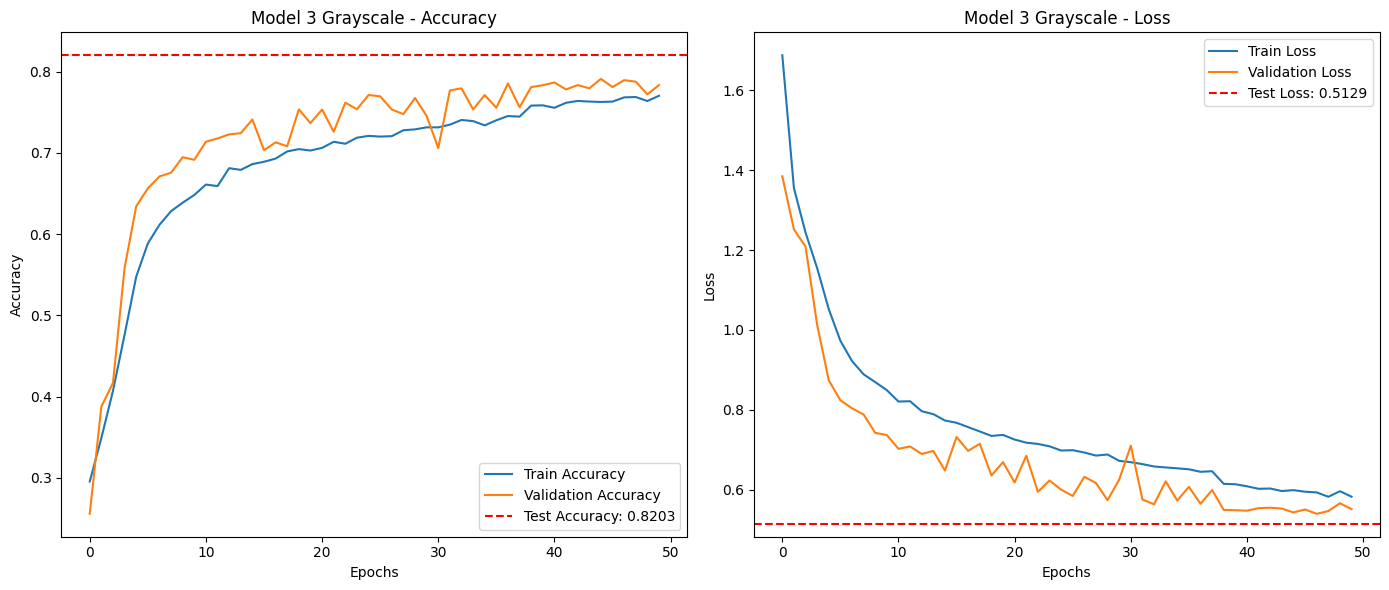

In [108]:
plot_model_performance_with_test(history_model_3, test_accuracy, test_loss, "Model 3 Grayscale")

### **Appendix 2: Model 2 Grayscale Performance with Test Accuracy**

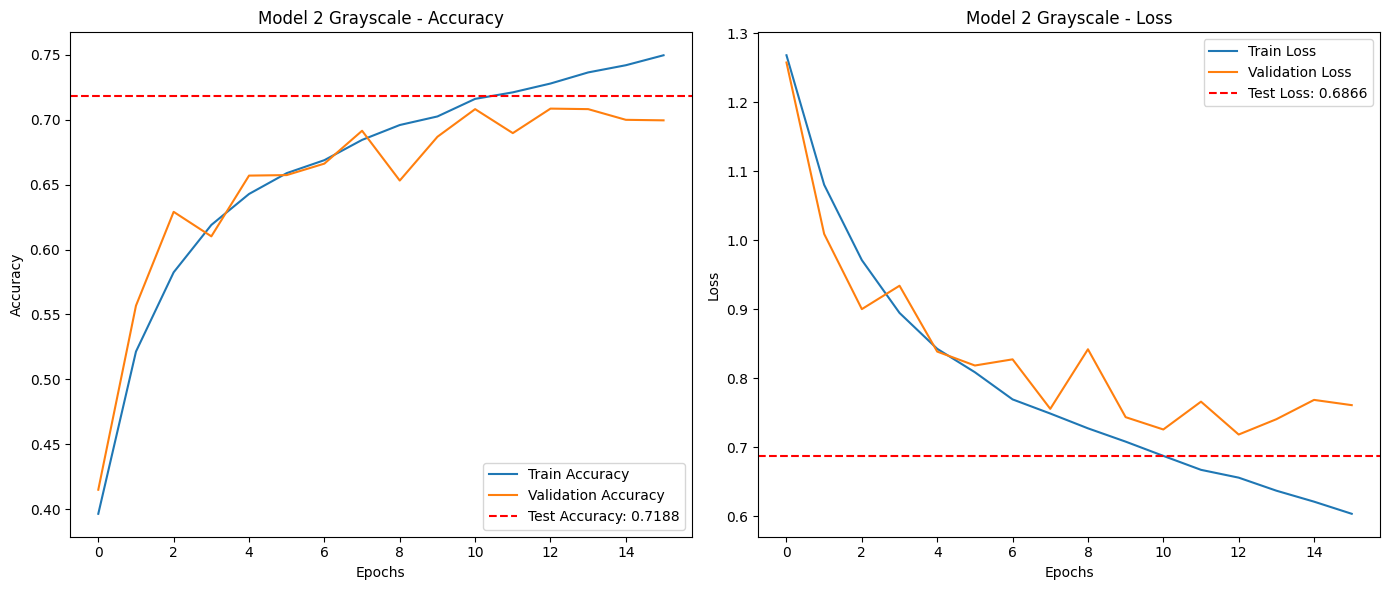

In [110]:
plot_model_performance_with_test(history_model_2, test_accuracy, test_loss, "Model 2 Grayscale")

### **Appendix 3: Confusion Matrix for Model 3 Grayscale**

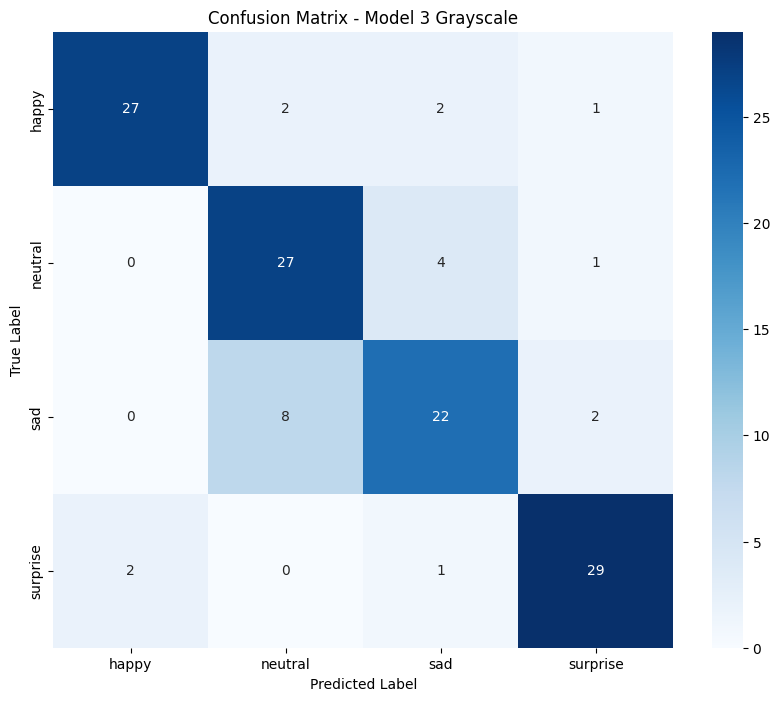

In [127]:
confusion_matrix_grayscale(model_3, test_set, model_name="Model 3 Grayscale")